In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask as dk
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score  
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv')

# Get the original feature names
originalFeatures = data.columns

# Print the count of original features and their names
print('Original features count:', len(originalFeatures))
print('Original features:', originalFeatures)

# Display the first few rows of the data
print(data.head())


Original features count: 48
Original features: Index(['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE',
       'URBANICITY', 'SES', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER',
       'INCOME_GROUP', 'PUBLISHED_PHONE', 'OVERLAY_SOURCE', 'MOR_HIT_RATE',
       'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv')

# Define the columns to drop
drops = [
    'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3',
    'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK', 
    'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',  
    'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_COUNT',
    'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT',
    'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
    'MEDIAN_HOME_VALUE',
    'PER_CAPITA_INCOME', 'SES', 'CLUSTER_CODE'
]

# Drop the specified columns
data.drop(columns=drops, inplace=True)

# Print the remaining columns
remaining_features = data.columns
print('Remaining features count:', len(remaining_features))
print('Remaining features:', list(remaining_features))


Remaining features count: 29
Remaining features: ['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT']


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv')

# Define the columns to keep
relevant_columns = [
    'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
    'URBANICITY', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT'
]

# Create a new DataFrame with only the relevant columns
data_subset = data[relevant_columns]

# Save the new DataFrame to a CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv'
data_subset.to_csv(output_file_path, index=False)

print('The selected columns have been saved to', output_file_path)


The selected columns have been saved to C:\Users\TITILAYO\Downloads\Prospective raw data.csv


In [4]:
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv'
data_subset.to_csv(output_file_path, index=False)

In [5]:
import pandas as pd

# Read the saved CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv'
saved_data = pd.read_csv(output_file_path)

# Check for null values in each column
null_values = saved_data.isnull().sum()

# Print the number of null values in each column
print(null_values)


CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_AVG_GIFT_AMT               0
RECENT_CARD_RESPONSE_PROP         0
RECENT_AVG_CARD_GIFT_AMT          0
RECENT_RESPONSE_COUNT             0
RECENT_CARD_RESPONSE_COUNT        0
MONTHS_SINCE_LAST_PROM_RESP      26
LIFETIME_GIFT_AMOUNT              0
LIFETIME_MIN_GIFT_AMT             0
LAST_GIFT_AMT                     0
CARD_PROM_12                      0
NUMBER_PROM_12                    0
MONTHS_SINCE_LAST_GIFT      

In [6]:
# Read the saved CSV file
saved_data = pd.read_csv(output_file_path)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,139,101,NaN,0,R,U,F,NaN,0,N,...,1,0,26.0,103.0,5.0,21.0,4,10,26,90
1,142,137,NaN,0,R,U,F,NaN,1,N,...,7,5,22.0,186.0,2.0,10.0,9,22,22,129
2,282,17,30.0,0,T,H,M,6.0,1,B,...,1,1,20.0,76.0,5.0,20.0,5,14,20,87
3,368,137,75.0,0,U,H,M,6.0,1,B,...,6,4,19.0,247.0,5.0,10.0,10,24,19,129
4,387,5,NaN,0,T,U,F,2.0,0,B,...,5,2,20.0,70.0,3.0,5.0,5,12,18,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,C,U,F,2.0,1,B,...,2,1,26.0,103.0,1.0,17.0,5,10,26,101
2144,191056,41,17.0,1,U,U,M,4.0,1,M,...,1,0,26.0,173.0,20.0,32.0,5,18,26,44
2145,191164,89,55.0,0,?,U,F,6.0,1,P,...,5,4,18.0,143.0,3.0,10.0,6,13,18,81
2146,191484,65,42.0,1,?,U,F,3.0,1,B,...,1,0,18.0,55.0,15.0,20.0,6,13,18,56


In [7]:
saved_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONTROL_NUMBER               2148 non-null   int64  
 1   MONTHS_SINCE_ORIGIN          2148 non-null   int64  
 2   DONOR_AGE                    1619 non-null   float64
 3   IN_HOUSE                     2148 non-null   int64  
 4   URBANICITY                   2148 non-null   object 
 5   HOME_OWNER                   2148 non-null   object 
 6   DONOR_GENDER                 2148 non-null   object 
 7   INCOME_GROUP                 1667 non-null   float64
 8   PUBLISHED_PHONE              2148 non-null   int64  
 9   OVERLAY_SOURCE               2148 non-null   object 
 10  MOR_HIT_RATE                 2148 non-null   int64  
 11  WEALTH_RATING                1142 non-null   float64
 12  MEDIAN_HOUSEHOLD_INCOME      2148 non-null   int64  
 13  PCT_OWNER_OCCUPIED

In [8]:
#Display summary statistics
saved_data.describe()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
count,2148.000000,2148.000000,1619.000000,2148.000000,1667.000000,2148.000000,2148.000000,1142.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2122.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,96146.865456,73.631285,58.185917,0.067970,3.902819,0.493017,3.357076,4.974606,339.798417,70.439013,...,3.051676,1.722067,19.077757,101.077039,7.622723,16.309828,5.331471,12.702514,18.378492,69.681564
std,54518.044553,41.969403,16.765323,0.251753,1.840627,0.500068,8.585609,2.809815,149.754159,21.006320,...,2.063643,1.557929,3.413522,95.313778,7.135016,10.367477,1.251732,4.441983,3.960876,38.325088
min,139.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-11.000000,15.000000,0.000000,0.000000,1.000000,3.000000,4.000000,15.000000
25%,51402.000000,29.000000,46.000000,0.000000,2.000000,0.000000,0.000000,3.000000,239.000000,61.000000,...,2.000000,1.000000,17.000000,40.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000
50%,96092.000000,65.000000,59.000000,0.000000,4.000000,0.000000,0.000000,5.000000,314.000000,76.000000,...,2.000000,1.000000,18.000000,76.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000
75%,143196.000000,113.000000,71.000000,0.000000,5.000000,1.000000,3.000000,7.000000,415.000000,85.000000,...,4.000000,2.000000,21.000000,130.000000,10.000000,20.000000,6.000000,13.000000,21.000000,105.000000
max,191710.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,1500.000000,99.000000,...,16.000000,9.000000,35.000000,1196.000000,100.000000,150.000000,13.000000,47.000000,27.000000,187.000000


In [9]:
# Check for class distribution in the target variable
saved_data.value_counts()

CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  URBANICITY  HOME_OWNER  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  OVERLAY_SOURCE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  PCT_OWNER_OCCUPIED  PCT_ATTRIBUTE4  PEP_STAR  RECENT_AVG_GIFT_AMT  RECENT_CARD_RESPONSE_PROP  RECENT_AVG_CARD_GIFT_AMT  RECENT_RESPONSE_COUNT  RECENT_CARD_RESPONSE_COUNT  MONTHS_SINCE_LAST_PROM_RESP  LIFETIME_GIFT_AMOUNT  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_AMT  CARD_PROM_12  NUMBER_PROM_12  MONTHS_SINCE_LAST_GIFT  MONTHS_SINCE_FIRST_GIFT
368             137                  75.0       0         U           H           M             6.0           1                B               1             7.0            485                      84                  41              1         8.83                 0.444                      8.75                      6                      4                           19.0                         247.0                 5.0                    10.0           10      

In [10]:
saved_data.head

<bound method NDFrame.head of       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE URBANICITY  \
0                139                  101        NaN         0          R   
1                142                  137        NaN         0          R   
2                282                   17       30.0         0          T   
3                368                  137       75.0         0          U   
4                387                    5        NaN         0          T   
...              ...                  ...        ...       ...        ...   
2143          190842                  101       47.0         1          C   
2144          191056                   41       17.0         1          U   
2145          191164                   89       55.0         0          ?   
2146          191484                   65       42.0         1          ?   
2147          191710                  137       77.0         1          C   

     HOME_OWNER DONOR_GENDER  INCOME_GROUP  P

In [11]:
saved_data.tail

<bound method NDFrame.tail of       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE URBANICITY  \
0                139                  101        NaN         0          R   
1                142                  137        NaN         0          R   
2                282                   17       30.0         0          T   
3                368                  137       75.0         0          U   
4                387                    5        NaN         0          T   
...              ...                  ...        ...       ...        ...   
2143          190842                  101       47.0         1          C   
2144          191056                   41       17.0         1          U   
2145          191164                   89       55.0         0          ?   
2146          191484                   65       42.0         1          ?   
2147          191710                  137       77.0         1          C   

     HOME_OWNER DONOR_GENDER  INCOME_GROUP  P

In [12]:
#dimensions of the data
saved_data.shape

(2148, 29)

Columns with missing values are;DONOR_AGE , INCOME_GROUP ,WEALTH_RATING, MONTHS_SINCE_LAST_PROM_RESP

Fill up missing values, using mean

In [13]:
# Check for missing values in the 'DONOR_AGE' column
missing_values = data['DONOR_AGE'].isnull().sum()
print("Number of missing values in 'DONOR_AGE' column:", missing_values)

Number of missing values in 'DONOR_AGE' column: 529


In [14]:
# Fill missing values in the 'DONOR_AGE' column with the mean of the column
data['DONOR_AGE'] = data['DONOR_AGE'].fillna(data['DONOR_AGE'].mean())

In [15]:
# Check for missing values in the 'DONOR_AGE' column after filling
missing_values_after_fill = data['DONOR_AGE'].isnull().sum()
print("Number of missing values in 'DONOR_AGE' column after filling:", missing_values_after_fill)

Number of missing values in 'DONOR_AGE' column after filling: 0


In [16]:
# Check for missing values in the 'INCOME_GROUP' column
missing_values = data['INCOME_GROUP'].isnull().sum()
print("Number of missing values in 'INCOME_GROUP' column:", missing_values)

Number of missing values in 'INCOME_GROUP' column: 481


In [17]:
# Fill missing values in the 'INCOME_GROUP' column with the mean of the column
data['INCOME_GROUP'] = data['INCOME_GROUP'].fillna(data['INCOME_GROUP'].mean())

In [18]:
# Check for missing values in the 'INCOME_GROUP' column after filling
missing_values_after_fill = data['INCOME_GROUP'].isnull().sum()
print("Number of missing values in 'INCOME_GROUP' column after filling:", missing_values_after_fill)

Number of missing values in 'INCOME_GROUP' column after filling: 0


In [19]:
# Check for missing values in the 'WEALTH_RATING' column
missing_values = data['WEALTH_RATING'].isnull().sum()
print("Number of missing values in 'WEALTH_RATING' column:", missing_values)

Number of missing values in 'WEALTH_RATING' column: 1006


In [20]:
# Fill missing values in the 'WEALTH_RATING' column with the mean of the column
data['WEALTH_RATING'] = data['WEALTH_RATING'].fillna(data['INCOME_GROUP'].mean())

In [21]:
# Check for missing values in the 'WEALTH_RATING column after filling
missing_values_after_fill = data['WEALTH_RATING'].isnull().sum()
print("Number of missing values in 'WEALTH_RATING' column after filling:", missing_values_after_fill)

Number of missing values in 'WEALTH_RATING' column after filling: 0


In [22]:
# Check for missing values in the 'MONTHS_SINCE_LAST_PROM_RESP' column
missing_values = data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum()
print("Number of missing values MONTHS_SINCE_LAST_PROM_RESP column:", missing_values)

Number of missing values MONTHS_SINCE_LAST_PROM_RESP column: 26


In [23]:
# Fill missing values in the 'MONTHS_SINCE_LAST_PROM_RESP ' column with the mean of the column
data['MONTHS_SINCE_LAST_PROM_RESP'] = data['MONTHS_SINCE_LAST_PROM_RESP'].fillna(data['MONTHS_SINCE_LAST_PROM_RESP'].mean())

In [24]:
# Check for missing values in the 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling
missing_values_after_fill = data['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum()
print("Number of missing values in 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling:", missing_values_after_fill)

Number of missing values in 'MONTHS_SINCE_LAST_PROM_RESP ' column after filling: 0


In [25]:
# Save the new DataFrame to a CSV file
output_file_path = 'C:\\Users\\TITILAYO\\Downloads\\Prospective raw data.csv'

In [26]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,...,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,139,101,NaN,0,R,U,F,NaN,0,N,...,1,0,26.0,103.0,5.0,21.0,4,10,26,90
1,142,137,NaN,0,R,U,F,NaN,1,N,...,7,5,22.0,186.0,2.0,10.0,9,22,22,129
2,282,17,30.0,0,T,H,M,6.0,1,B,...,1,1,20.0,76.0,5.0,20.0,5,14,20,87
3,368,137,75.0,0,U,H,M,6.0,1,B,...,6,4,19.0,247.0,5.0,10.0,10,24,19,129
4,387,5,NaN,0,T,U,F,2.0,0,B,...,5,2,20.0,70.0,3.0,5.0,5,12,18,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,C,U,F,2.0,1,B,...,2,1,26.0,103.0,1.0,17.0,5,10,26,101
2144,191056,41,17.0,1,U,U,M,4.0,1,M,...,1,0,26.0,173.0,20.0,32.0,5,18,26,44
2145,191164,89,55.0,0,?,U,F,6.0,1,P,...,5,4,18.0,143.0,3.0,10.0,6,13,18,81
2146,191484,65,42.0,1,?,U,F,3.0,1,B,...,1,0,18.0,55.0,15.0,20.0,6,13,18,56


Encoding URBANICITY Column

In [27]:
import pandas as pd

# Read the saved data CSV file
saved_data = pd.read_csv('Prospective raw data.csv')

# Define mapping dictionary
urbanicity_map = {'U': 5, 'C': 4, 'S': 3, 'T': 2, 'R': 1, '?': 0}

# Map the values in the 'URBANICITY' column using the dictionary and create a new column
saved_data['URBANICITY_encoded'] = saved_data['URBANICITY'].map(urbanicity_map)

# Drop the original 'URBANICITY' column
saved_data.drop(columns=['URBANICITY'], inplace=True)

# Print the updated DataFrame
print(saved_data)

      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0                139                  101        NaN         0          U   
1                142                  137        NaN         0          U   
2                282                   17       30.0         0          H   
3                368                  137       75.0         0          H   
4                387                    5        NaN         0          U   
...              ...                  ...        ...       ...        ...   
2143          190842                  101       47.0         1          U   
2144          191056                   41       17.0         1          U   
2145          191164                   89       55.0         0          U   
2146          191484                   65       42.0         1          U   
2147          191710                  137       77.0         1          H   

     DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE OVERLAY_SOURCE  MOR_HIT_RA

In [28]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,...,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded
0,139,101,NaN,0,U,F,NaN,0,N,0,...,0,26.0,103.0,5.0,21.0,4,10,26,90,1
1,142,137,NaN,0,U,F,NaN,1,N,0,...,5,22.0,186.0,2.0,10.0,9,22,22,129,1
2,282,17,30.0,0,H,M,6.0,1,B,11,...,1,20.0,76.0,5.0,20.0,5,14,20,87,2
3,368,137,75.0,0,H,M,6.0,1,B,1,...,4,19.0,247.0,5.0,10.0,10,24,19,129,5
4,387,5,NaN,0,U,F,2.0,0,B,0,...,2,20.0,70.0,3.0,5.0,5,12,18,85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,U,F,2.0,1,B,3,...,1,26.0,103.0,1.0,17.0,5,10,26,101,4
2144,191056,41,17.0,1,U,M,4.0,1,M,16,...,0,26.0,173.0,20.0,32.0,5,18,26,44,5
2145,191164,89,55.0,0,U,F,6.0,1,P,0,...,4,18.0,143.0,3.0,10.0,6,13,18,81,0
2146,191484,65,42.0,1,U,F,3.0,1,B,5,...,0,18.0,55.0,15.0,20.0,6,13,18,56,0


Encoding Overlay Source

In [30]:

# Read the saved data CSV file
saved_data = pd.read_csv('Prospective raw data.csv')

# Define mapping dictionary
Overlay_source_map = {'B': 3, 'P': 2, 'M': 1, 'N': 0}

# Map the values in the 'OVERLAY_SOURCE' column using the dictionary and create a new column
saved_data['OVERLAY_SOURCE_encoded'] = saved_data['OVERLAY_SOURCE'].map(Overlay_source_map)

# Drop the original 'OVERLAY_SOURCE' column
saved_data.drop(columns=['OVERLAY_SOURCE'], inplace=True)

# Print the updated DataFrame
print(saved_data)

      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0                139                  101        NaN         0          U   
1                142                  137        NaN         0          U   
2                282                   17       30.0         0          H   
3                368                  137       75.0         0          H   
4                387                    5        NaN         0          U   
...              ...                  ...        ...       ...        ...   
2143          190842                  101       47.0         1          U   
2144          191056                   41       17.0         1          U   
2145          191164                   89       55.0         0          U   
2146          191484                   65       42.0         1          U   
2147          191710                  137       77.0         1          H   

     DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATI

In [31]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)

In [32]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded
0,139,101,NaN,0,U,F,NaN,0,0,NaN,...,26.0,103.0,5.0,21.0,4,10,26,90,1,0
1,142,137,NaN,0,U,F,NaN,1,0,1.0,...,22.0,186.0,2.0,10.0,9,22,22,129,1,0
2,282,17,30.0,0,H,M,6.0,1,11,NaN,...,20.0,76.0,5.0,20.0,5,14,20,87,2,3
3,368,137,75.0,0,H,M,6.0,1,1,7.0,...,19.0,247.0,5.0,10.0,10,24,19,129,5,3
4,387,5,NaN,0,U,F,2.0,0,0,NaN,...,20.0,70.0,3.0,5.0,5,12,18,85,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,U,F,2.0,1,3,7.0,...,26.0,103.0,1.0,17.0,5,10,26,101,4,3
2144,191056,41,17.0,1,U,M,4.0,1,16,9.0,...,26.0,173.0,20.0,32.0,5,18,26,44,5,1
2145,191164,89,55.0,0,U,F,6.0,1,0,8.0,...,18.0,143.0,3.0,10.0,6,13,18,81,0,2
2146,191484,65,42.0,1,U,F,3.0,1,5,7.0,...,18.0,55.0,15.0,20.0,6,13,18,56,0,3


Treating NAN values in dataframe

In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Prospective raw data.csv')

# Check for NaN values in the entire DataFrame
nan_values = df.isna()

# Print the DataFrame with NaN values
print("DataFrame with NaN values:\n", nan_values)

# Check for NaN values in each column
nan_counts = df.isna().sum()

# Print the count of NaN values in each column
print("\nCount of NaN values in each column:\n", nan_counts)

# Check for rows with any NaN values
rows_with_nan = df[df.isna().any(axis=1)]

# Print rows with any NaN values
print("\nRows with any NaN values:\n", rows_with_nan)


DataFrame with NaN values:
       CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  HOME_OWNER  \
0              False                False       True     False       False   
1              False                False       True     False       False   
2              False                False      False     False       False   
3              False                False      False     False       False   
4              False                False       True     False       False   
...              ...                  ...        ...       ...         ...   
2143           False                False      False     False       False   
2144           False                False      False     False       False   
2145           False                False      False     False       False   
2146           False                False      False     False       False   
2147           False                False      False     False       False   

      DONOR_GENDER  INCOME_GROUP  P

In [34]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)
saved_data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_GIFT_AMOUNT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded
0,139,101,NaN,0,U,F,NaN,0,0,NaN,...,26.0,103.0,5.0,21.0,4,10,26,90,1,0
1,142,137,NaN,0,U,F,NaN,1,0,1.0,...,22.0,186.0,2.0,10.0,9,22,22,129,1,0
2,282,17,30.0,0,H,M,6.0,1,11,NaN,...,20.0,76.0,5.0,20.0,5,14,20,87,2,3
3,368,137,75.0,0,H,M,6.0,1,1,7.0,...,19.0,247.0,5.0,10.0,10,24,19,129,5,3
4,387,5,NaN,0,U,F,2.0,0,0,NaN,...,20.0,70.0,3.0,5.0,5,12,18,85,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,U,F,2.0,1,3,7.0,...,26.0,103.0,1.0,17.0,5,10,26,101,4,3
2144,191056,41,17.0,1,U,M,4.0,1,16,9.0,...,26.0,173.0,20.0,32.0,5,18,26,44,5,1
2145,191164,89,55.0,0,U,F,6.0,1,0,8.0,...,18.0,143.0,3.0,10.0,6,13,18,81,0,2
2146,191484,65,42.0,1,U,F,3.0,1,5,7.0,...,18.0,55.0,15.0,20.0,6,13,18,56,0,3


The Columns with NAN values are;DONOR_AGE , INCOME_GROUP, WEALTH_RATING, MONTHS_SINCE_LAST_PROM_RESP, OVERLAY_SOURCE_encoded

In [35]:
import pandas as pd

# Load the DataFrame from the CSV file
data = pd.read_csv('Prospective raw data.csv')

# Fill NaN values in 'INCOME_GROUP' , 'DONOR_AGE' , 'WEALTH_RATING' , 'MONTHS_SINCE_LAST_PROM_RESP, 'OVERLAY_SOURCE_encoded with the mean of each column
data['INCOME_GROUP'].fillna(data['INCOME_GROUP'].mean(), inplace=True)
data['DONOR_AGE'].fillna(data['DONOR_AGE'].mean(), inplace=True)
data['WEALTH_RATING'].fillna(data['WEALTH_RATING'].mean(), inplace=True)
data['MONTHS_SINCE_LAST_PROM_RESP'].fillna(data['MONTHS_SINCE_LAST_PROM_RESP'].mean(), inplace=True)
data['OVERLAY_SOURCE_encoded'].fillna(data['OVERLAY_SOURCE_encoded'].mean(), inplace=True)

# Verify that NaN values have been filled
print("NaN values after filling:")
print(data[['INCOME_GROUP', 'DONOR_AGE', 'WEALTH_RATING', 'MONTHS_SINCE_LAST_PROM_RESP', 'OVERLAY_SOURCE_encoded']].isnull().sum())

# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())


NaN values after filling:
INCOME_GROUP                   0
DONOR_AGE                      0
WEALTH_RATING                  0
MONTHS_SINCE_LAST_PROM_RESP    0
OVERLAY_SOURCE_encoded         0
dtype: int64
   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0             139                  101  58.185917         0          U   
1             142                  137  58.185917         0          U   
2             282                   17  30.000000         0          H   
3             368                  137  75.000000         0          H   
4             387                    5  58.185917         0          U   

  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0            F      3.902819                0             0       4.974606   
1            F      3.902819                1             0       1.000000   
2            M      6.000000                1            11       4.974606   
3            M      6.000000           

In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Prospective raw data.csv')

# Perform one-hot encoding on 'DONOR_GENDER'
one_hot_encoded = pd.get_dummies(data['DONOR_GENDER'])

# Concatenate one-hot encoded columns into a single string
data['DONOR_GENDER_ONE_HOT'] = one_hot_encoded.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Drop the original 'DONOR_GENDER' column if needed
data.drop(columns=['DONOR_GENDER'], inplace=True)

# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

# Print the resulting DataFrame to verify the changes
print(data)

      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE HOME_OWNER  \
0                139                  101  58.185917         0          U   
1                142                  137  58.185917         0          U   
2                282                   17  30.000000         0          H   
3                368                  137  75.000000         0          H   
4                387                    5  58.185917         0          U   
...              ...                  ...        ...       ...        ...   
2143          190842                  101  47.000000         1          U   
2144          191056                   41  17.000000         1          U   
2145          191164                   89  55.000000         0          U   
2146          191484                   65  42.000000         1          U   
2147          191710                  137  77.000000         1          H   

      INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  \
0      

In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Prospective raw data.csv')

# Perform one-hot encoding on 'HOME_OWNER'
one_hot_encoded = pd.get_dummies(data['HOME_OWNER'])

# Concatenate one-hot encoded columns into a single string
data['HOME_OWNER_ONE_HOT'] = one_hot_encoded.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Drop the original 'DONOR_GENDER' column if needed
data.drop(columns=['HOME_OWNER'], inplace=True)

# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

# Print the resulting DataFrame to verify the changes
print(data)

      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0                139                  101  58.185917         0      3.902819   
1                142                  137  58.185917         0      3.902819   
2                282                   17  30.000000         0      6.000000   
3                368                  137  75.000000         0      6.000000   
4                387                    5  58.185917         0      2.000000   
...              ...                  ...        ...       ...           ...   
2143          190842                  101  47.000000         1      2.000000   
2144          191056                   41  17.000000         1      4.000000   
2145          191164                   89  55.000000         0      6.000000   
2146          191484                   65  42.000000         1      3.000000   
2147          191710                  137  77.000000         1      5.000000   

      PUBLISHED_PHONE  MOR_HIT_RATE  WE

In [38]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())

   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0             139                  101  58.185917         0      3.902819   
1             142                  137  58.185917         0      3.902819   
2             282                   17  30.000000         0      6.000000   
3             368                  137  75.000000         0      6.000000   
4             387                    5  58.185917         0      2.000000   

   PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  \
0                0             0       4.974606                      219   
1                1             0       1.000000                      227   
2                1            11       4.974606                      544   
3                1             1       7.000000                      485   
4                0             0       4.974606                      413   

   PCT_OWNER_OCCUPIED  ...  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_AMT  \
0           

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the updated DataFrame from the CSV file
data = pd.read_csv('Prospective raw data.csv')

# Define the numerical columns to be scaled
numerical_columns = ['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
     'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

print(data)

      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0          -1.761439             0.652263   0.000000 -0.270050      0.000000   
1          -1.761384             1.510230   0.000000 -0.270050      0.000000   
2          -1.758816            -1.349661  -1.937083 -0.270050      1.293748   
3          -1.757238             1.510230   1.155551 -0.270050      1.293748   
4          -1.756889            -1.635650   0.000000 -0.270050     -1.173847   
...              ...                  ...        ...       ...           ...   
2143        1.737355             0.652263  -0.768754  3.703016     -1.173847   
2144        1.741281            -0.777683  -2.830510  3.703016      0.059951   
2145        1.743262             0.366274  -0.218953 -0.270050      1.293748   
2146        1.749133            -0.205704  -1.112380  3.703016     -0.556948   
2147        1.753280             1.510230   1.293001  3.703016      0.676849   

      PUBLISHED_PHONE  MOR_HIT_RATE  WE

In [40]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

Skew Numerical Columns to be able to see any visible outliers in the dataset

In [41]:
# Load the scaled_data DataFrame from the CSV file
data = pd.read_csv('Prospective raw data.csv')


# Select the columns in the Prospective raw data.csv to check for skewness
columns_to_check = ['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 
     'INCOME_GROUP', 'PUBLISHED_PHONE', 
    'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
    'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
    'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
    'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
    'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
    'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']


# Calculate skewness for each column
for column in columns_to_check:
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness}")
    

Skewness of CONTROL_NUMBER: -0.01758301181432023
Skewness of MONTHS_SINCE_ORIGIN: 0.22039584348504684
Skewness of DONOR_AGE: -0.39394401303662974
Skewness of IN_HOUSE: 3.4353655049670153
Skewness of INCOME_GROUP: -0.016070613265323153
Skewness of PUBLISHED_PHONE: 0.02795521121372753
Skewness of MOR_HIT_RATE: 11.599961046310225
Skewness of WEALTH_RATING: -0.2214663543164497
Skewness of MEDIAN_HOUSEHOLD_INCOME: 1.4399244248858147
Skewness of PCT_OWNER_OCCUPIED: -1.2686260524708757
Skewness of PCT_ATTRIBUTE4: 0.4255253410855931
Skewness of PEP_STAR: 0.014908405370458526
Skewness of RECENT_AVG_GIFT_AMT: 2.9357416020592235
Skewness of RECENT_CARD_RESPONSE_PROP: 0.7700558765409912
Skewness of RECENT_AVG_CARD_GIFT_AMT: 2.031027061276444
Skewness of RECENT_RESPONSE_COUNT: 1.4154915918583977
Skewness of RECENT_CARD_RESPONSE_COUNT: 1.3258791772219618
Skewness of MONTHS_SINCE_LAST_PROM_RESP: 0.3945345387605888
Skewness of LIFETIME_GIFT_AMOUNT: 3.5479683639104356
Skewness of LIFETIME_MIN_GIFT_AMT:

Outlier counts

In [42]:
# Save the transformed DataFrame to a new CSV file
data.to_csv('Prospective raw data.csv', index=False)

In [43]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Prospective raw data.csv')  # Replace 'Prospective raw data.csv' with the path to your dataset file

# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Apply the function to each column and create a Series with the results
outlier_counts = data.apply(count_outliers)

# Filter columns with outliers
columns_with_outliers = outlier_counts[outlier_counts > 0]

# Print the columns with outlier counts
print("Columns with Outliers:")
print(columns_with_outliers)


Columns with Outliers:
DONOR_AGE                       29
IN_HOUSE                       146
MOR_HIT_RATE                   317
WEALTH_RATING                  664
MEDIAN_HOUSEHOLD_INCOME         55
PCT_OWNER_OCCUPIED             103
PCT_ATTRIBUTE4                  33
RECENT_AVG_GIFT_AMT             75
RECENT_CARD_RESPONSE_PROP       35
RECENT_AVG_CARD_GIFT_AMT        68
RECENT_RESPONSE_COUNT           85
RECENT_CARD_RESPONSE_COUNT     266
MONTHS_SINCE_LAST_PROM_RESP     23
LIFETIME_GIFT_AMOUNT           104
LIFETIME_MIN_GIFT_AMT           97
LAST_GIFT_AMT                   77
CARD_PROM_12                   177
NUMBER_PROM_12                 347
MONTHS_SINCE_LAST_GIFT          66
dtype: int64


Boxplot and Histogram Visuals before removing outliers

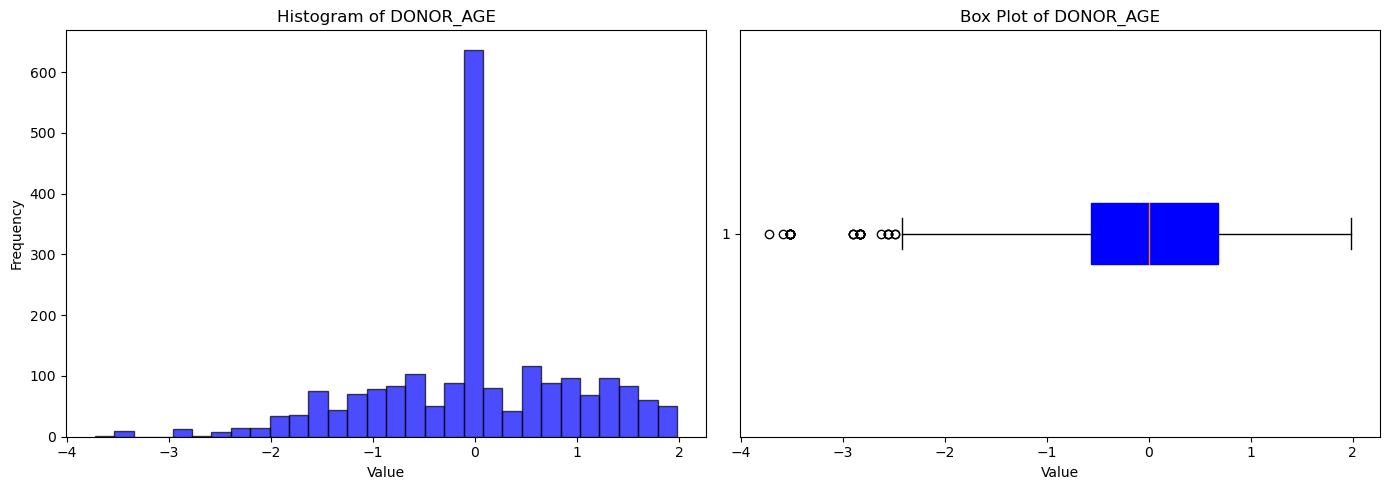

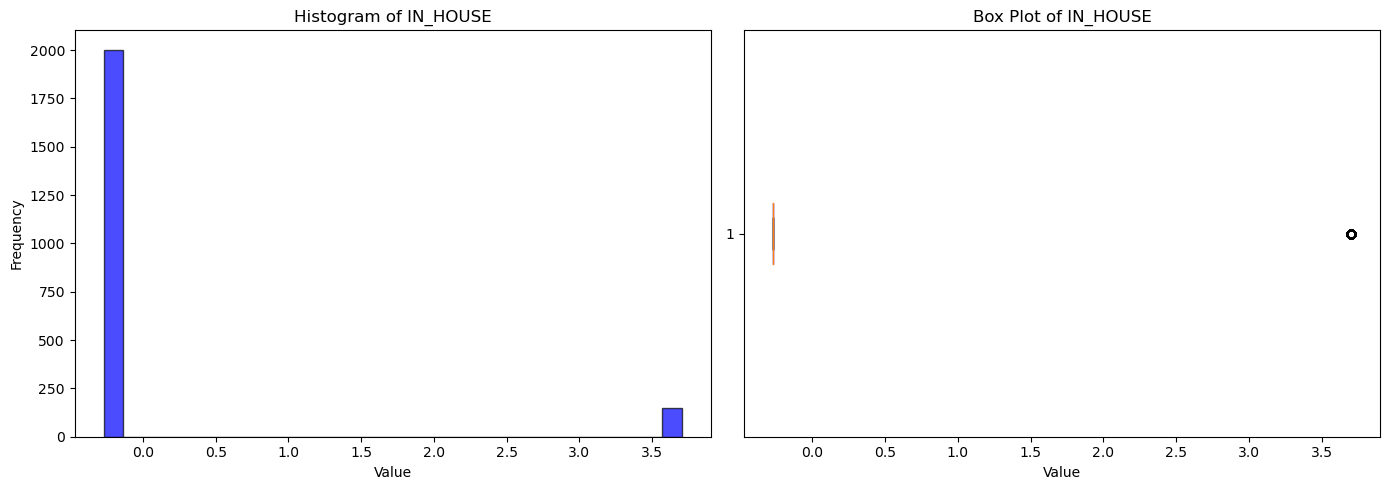

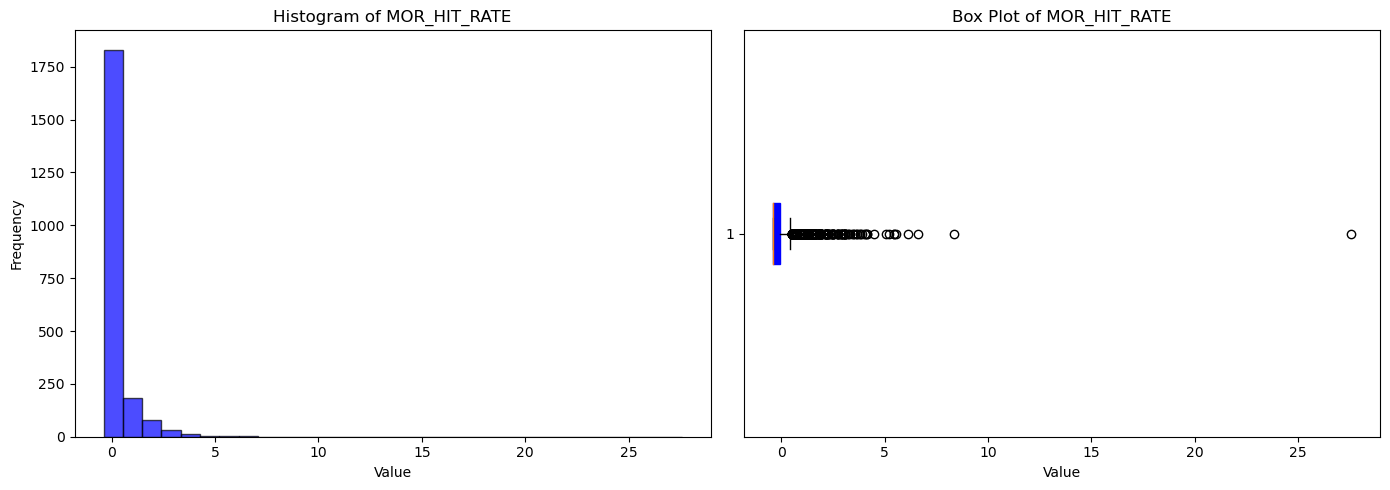

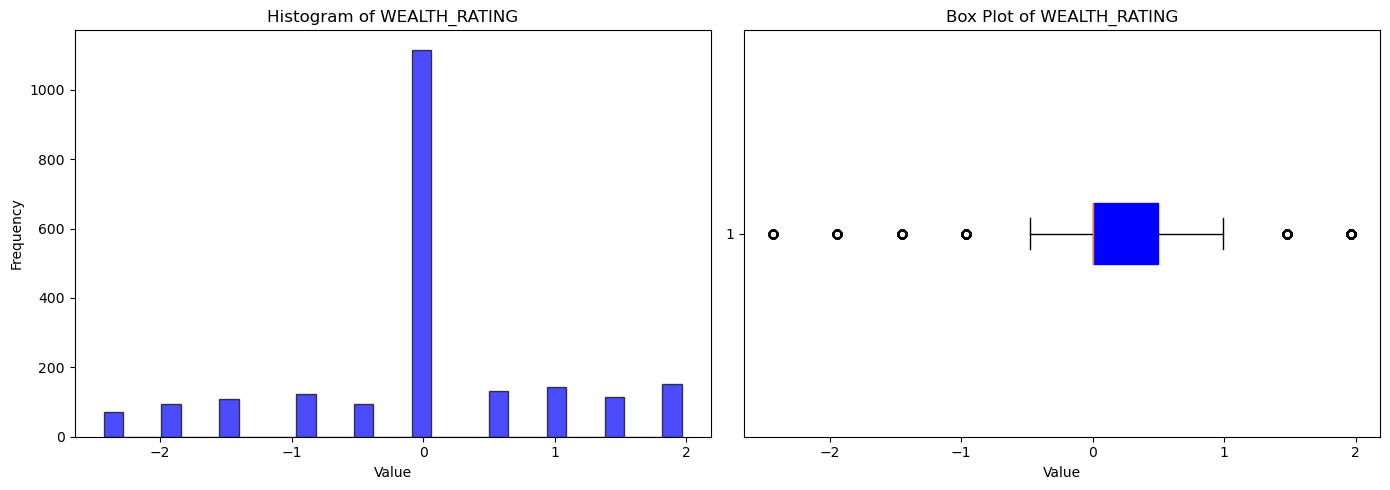

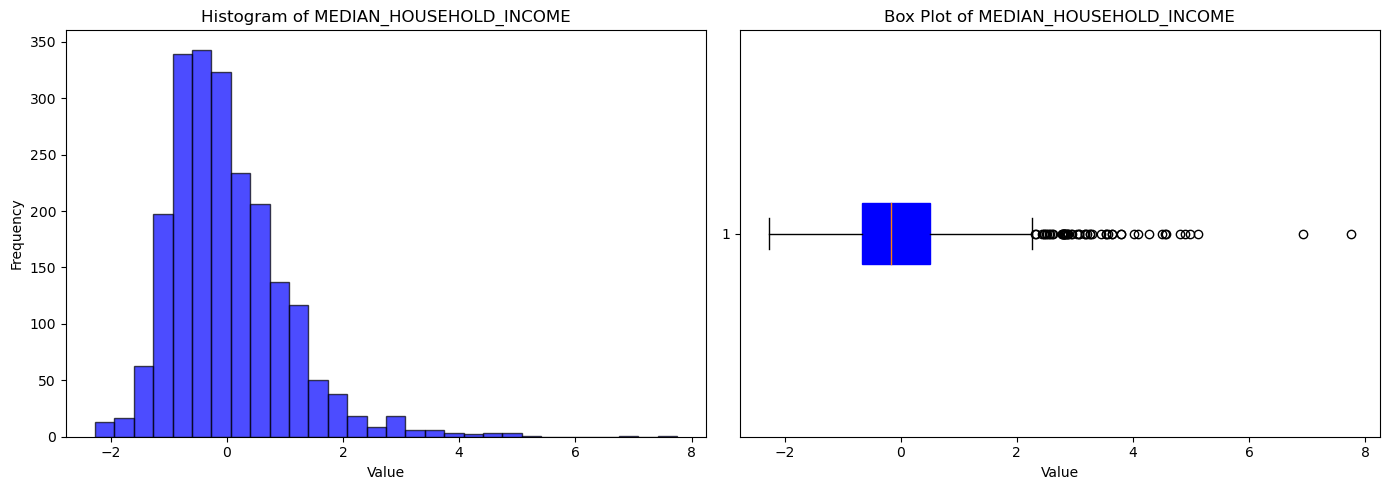

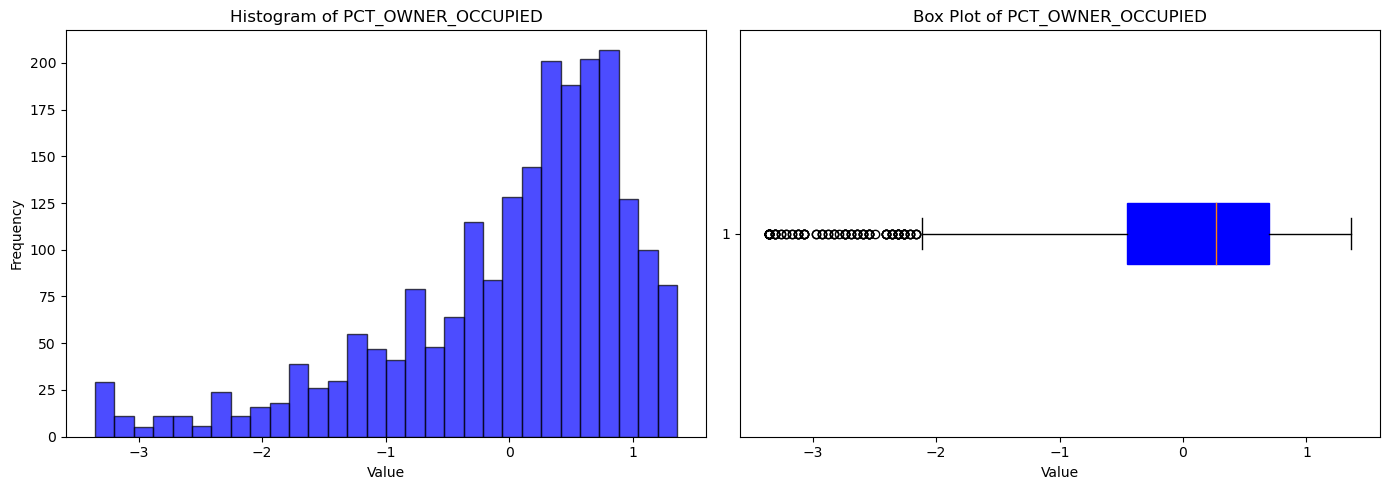

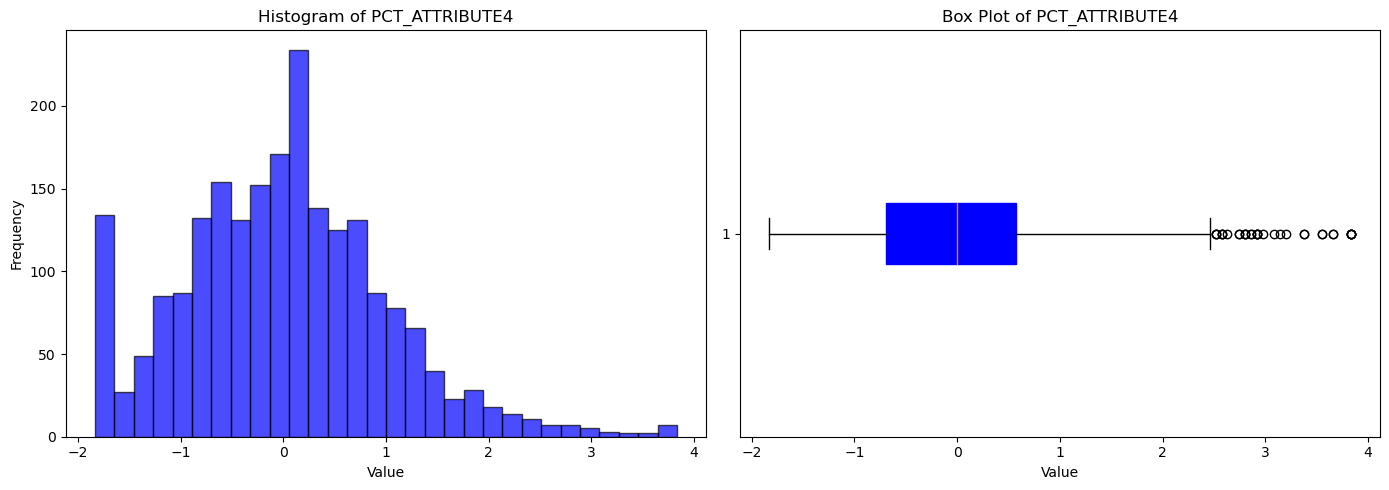

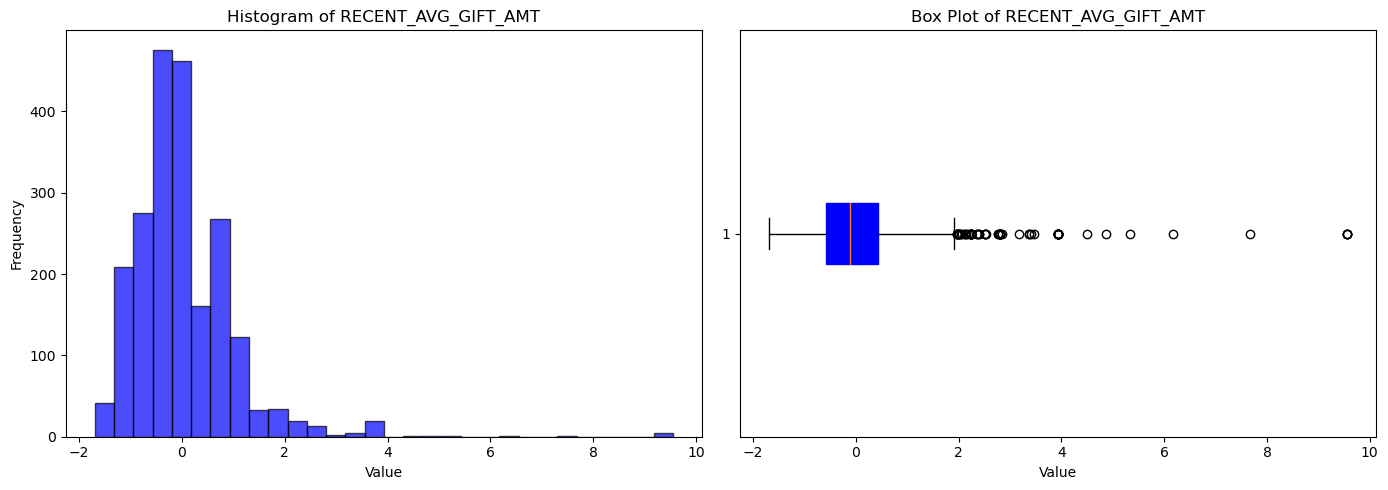

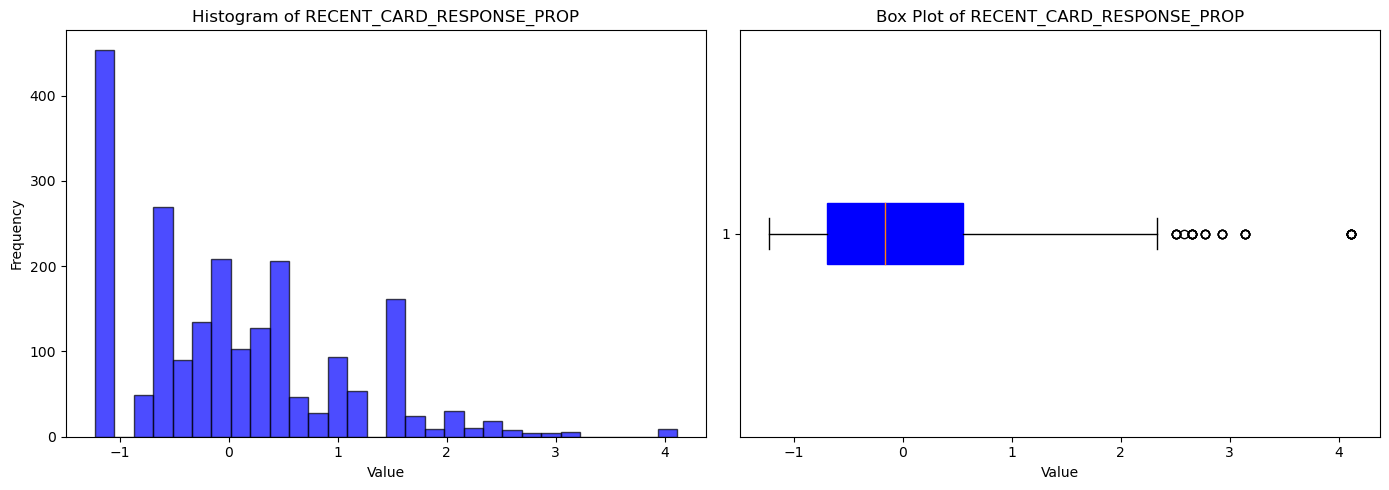

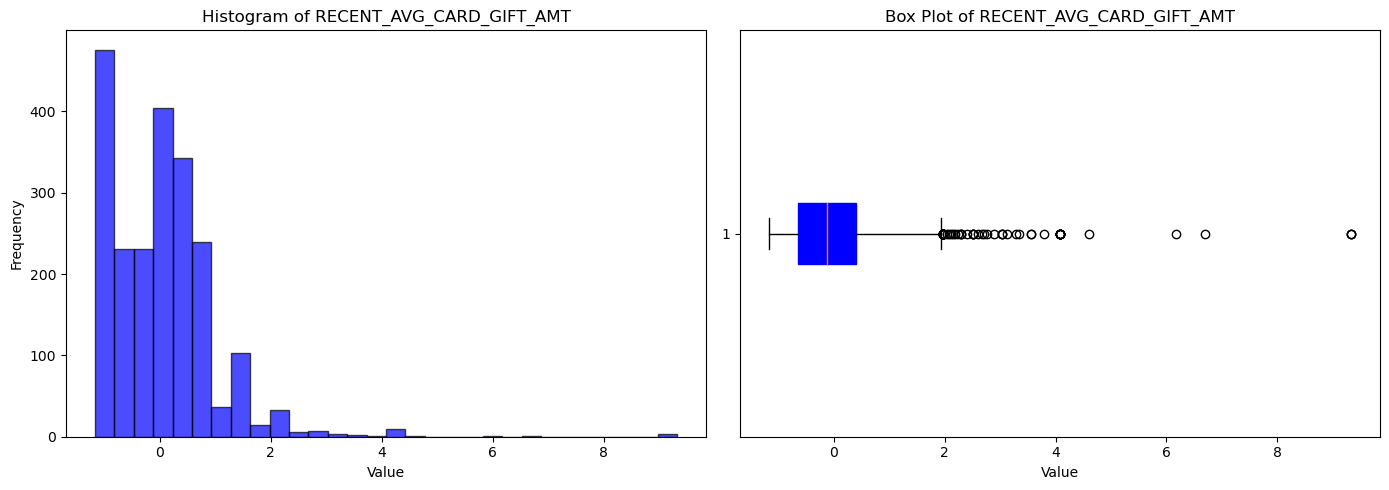

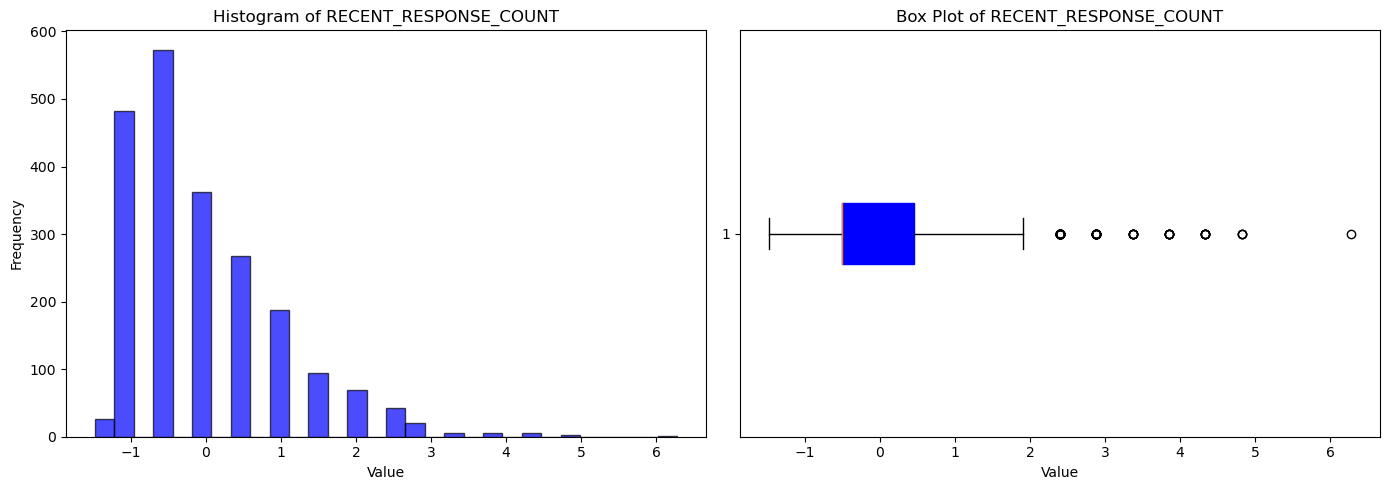

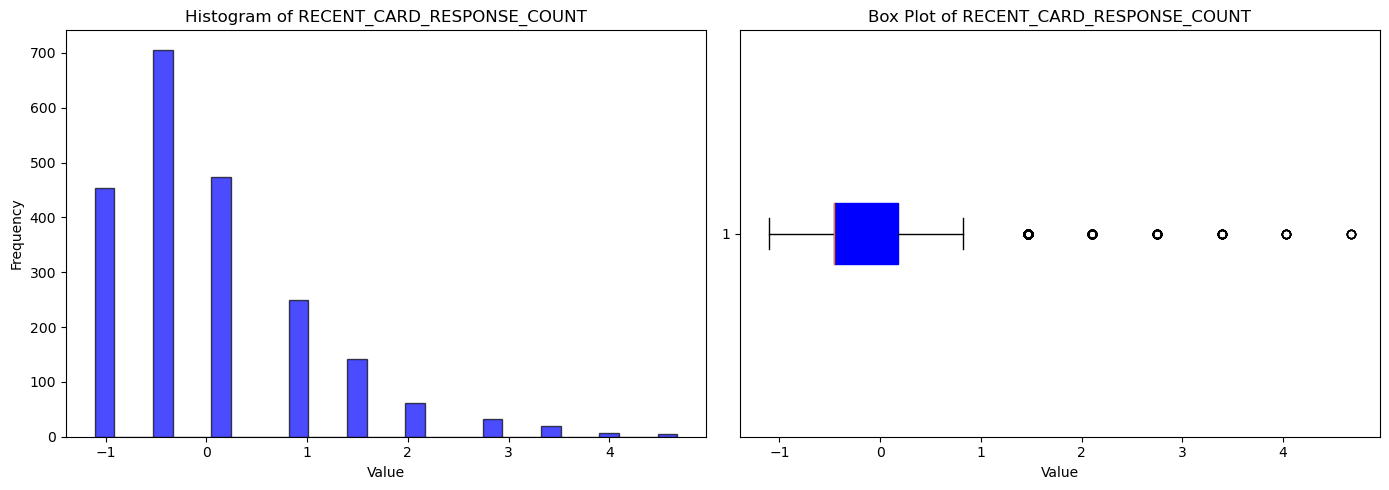

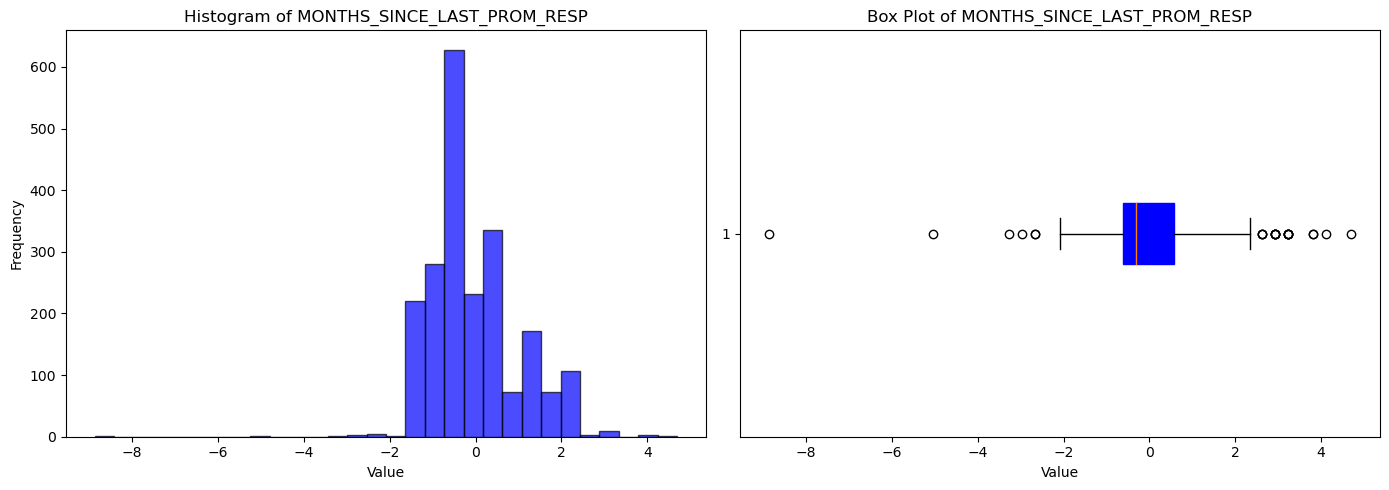

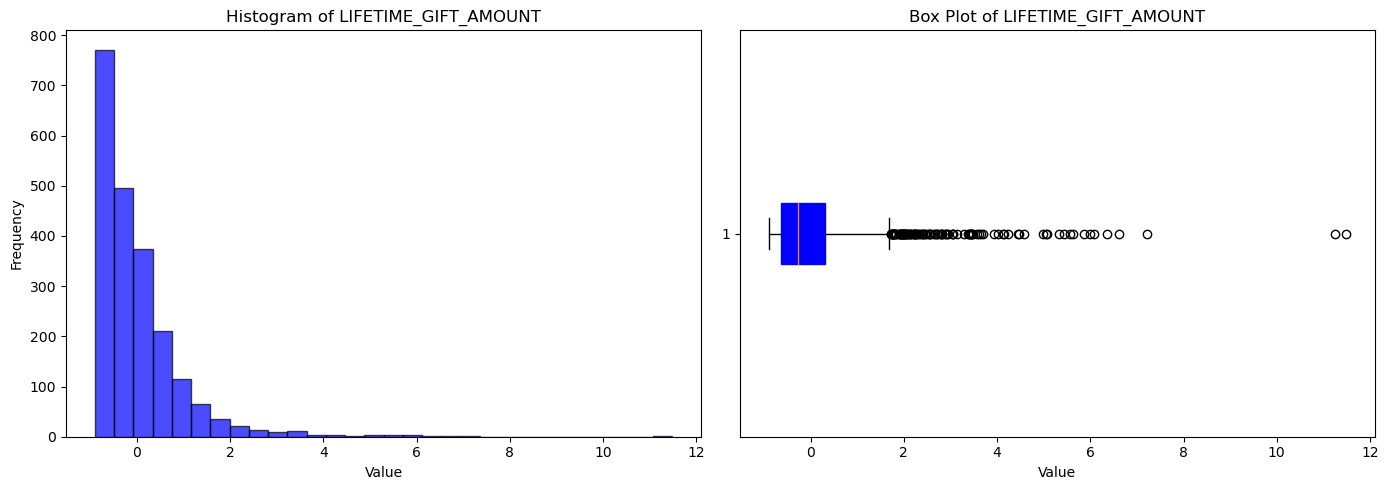

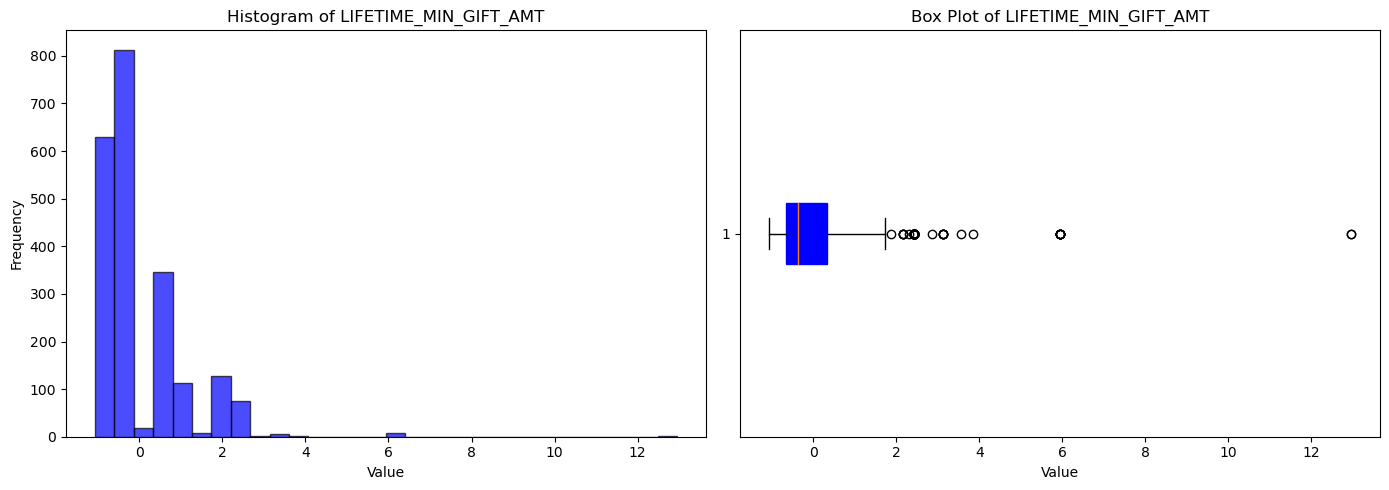

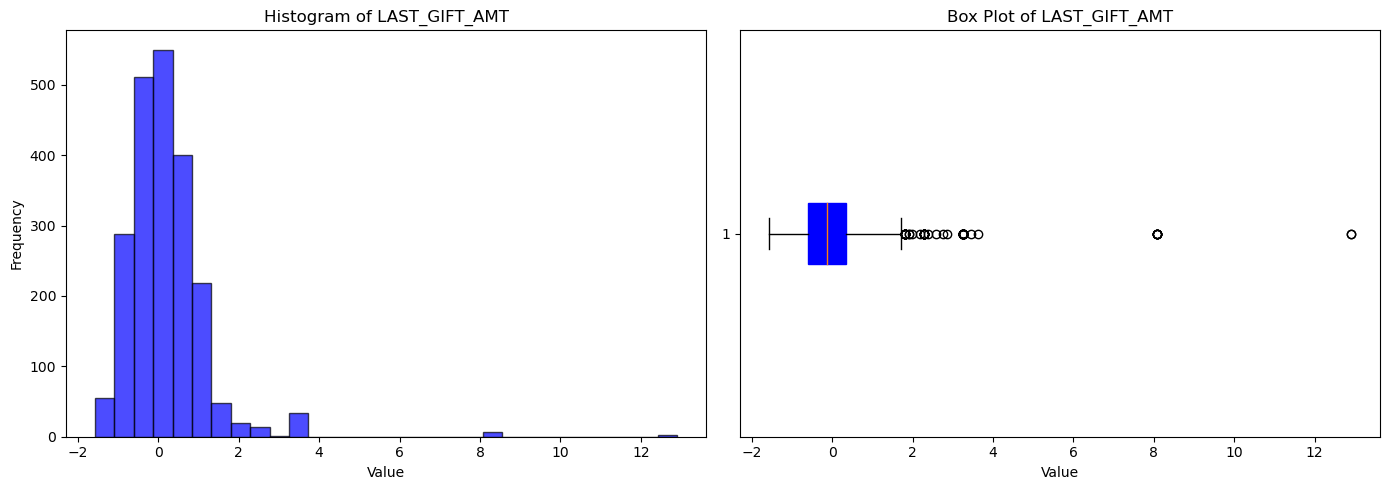

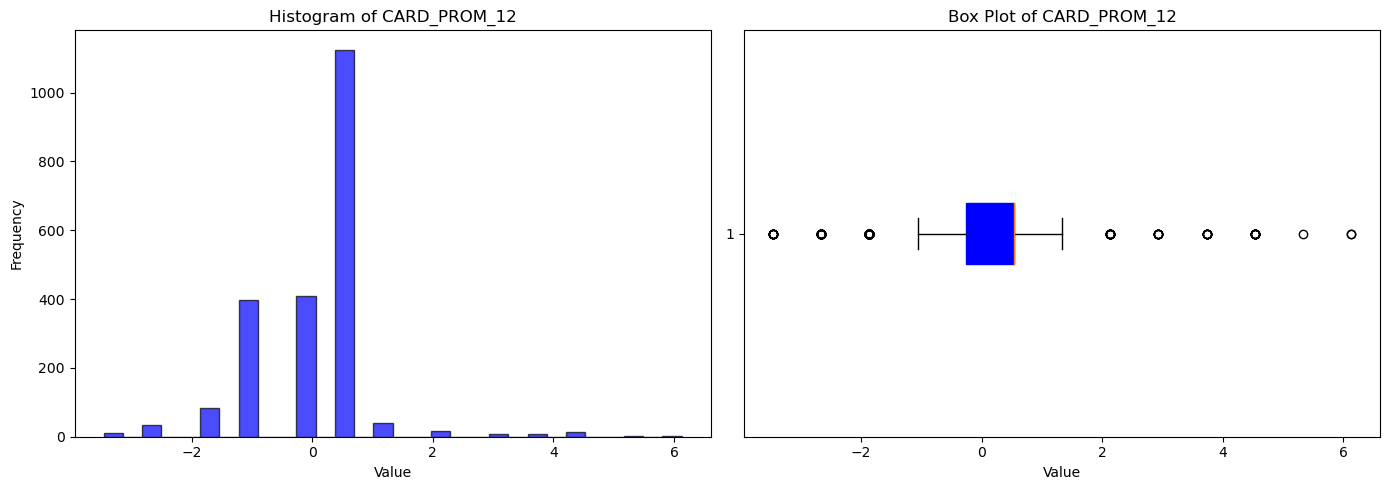

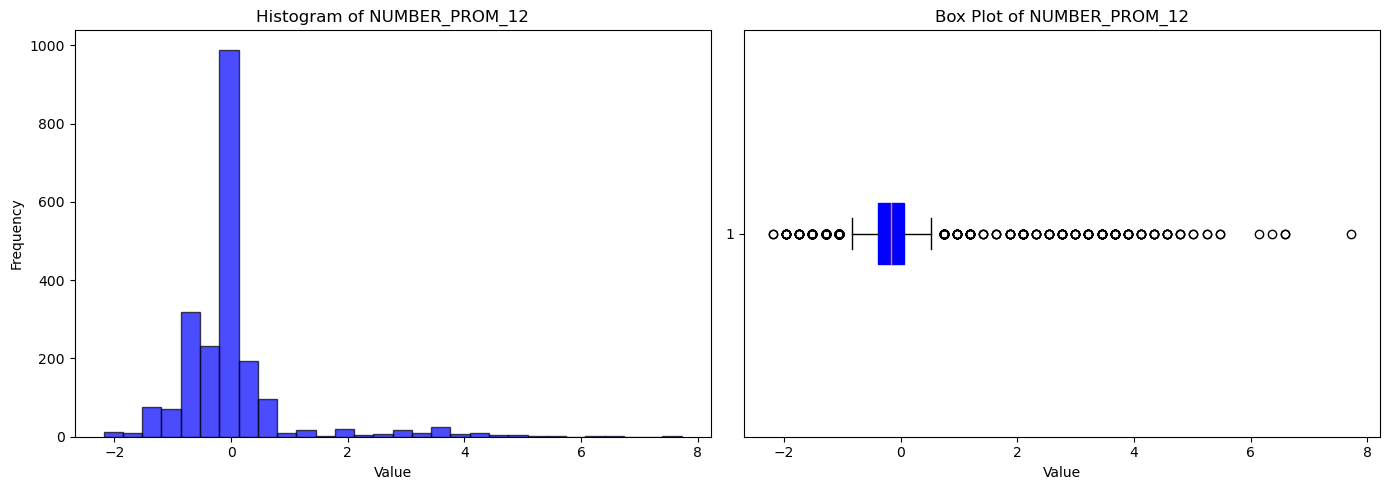

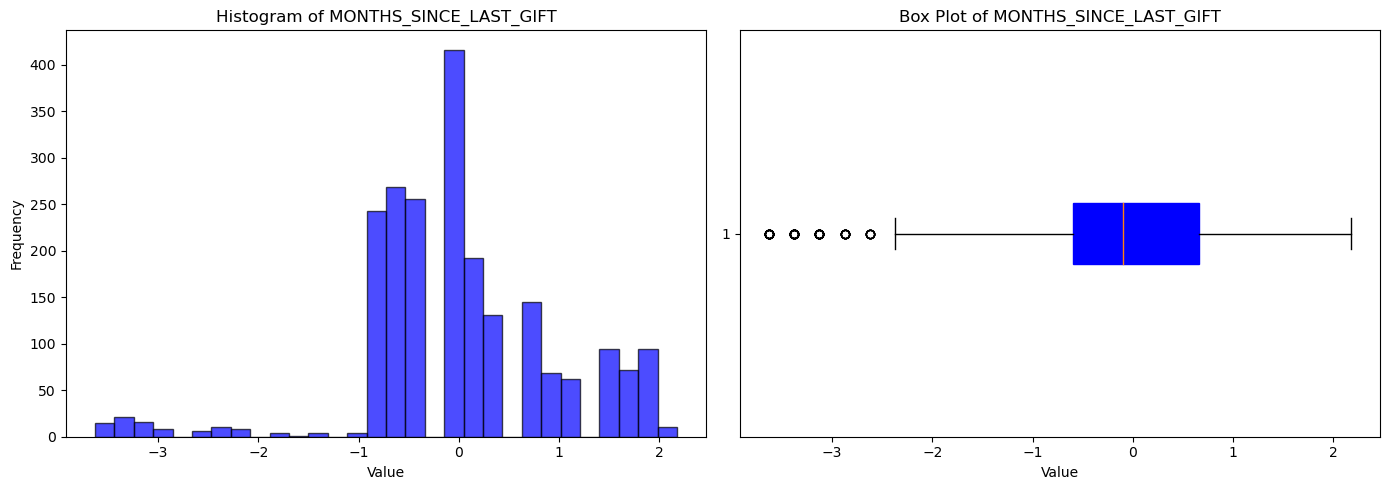

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Prospective raw data.csv')  # Replace 'Prospective raw data.csv' with the path to your dataset file

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME',
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
                         'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT',
                         'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT']

# Plot histograms and box plots for each column with outliers
for column in columns_with_outliers:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axs[0].hist(data[column].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[0].set_title(f"Histogram of {column}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    
    # Box plot
    axs[1].boxplot(data[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    axs[1].set_title(f"Box Plot of {column}")
    axs[1].set_xlabel("Value")
    
    plt.tight_layout()
    plt.show()


I need to treat and remove the Outlier 

In [45]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Prospective raw data.csv')

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME',
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
                         'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT',
                         'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT']

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to each column with outliers
for column in columns_with_outliers:
    cap_outliers(data, column)

# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data treated.csv', index=False)

# Print the updated DataFrame to verify the changes
print(data)


      CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0          -1.761439             0.652263   0.000000  -0.27005      0.000000   
1          -1.761384             1.510230   0.000000  -0.27005      0.000000   
2          -1.758816            -1.349661  -1.937083  -0.27005      1.293748   
3          -1.757238             1.510230   1.155551  -0.27005      1.293748   
4          -1.756889            -1.635650   0.000000  -0.27005     -1.173847   
...              ...                  ...        ...       ...           ...   
2143        1.737355             0.652263  -0.768754  -0.27005     -1.173847   
2144        1.741281            -0.777683  -2.418159  -0.27005      0.059951   
2145        1.743262             0.366274  -0.218953  -0.27005      1.293748   
2146        1.749133            -0.205704  -1.112380  -0.27005     -0.556948   
2147        1.753280             1.510230   1.293001  -0.27005      0.676849   

      PUBLISHED_PHONE  MOR_HIT_RATE  WE

In [46]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

# Print the first few rows of the updated DataFrame to verify changes
print(data.head())


   CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  IN_HOUSE  INCOME_GROUP  \
0       -1.761439             0.652263   0.000000  -0.27005      0.000000   
1       -1.761384             1.510230   0.000000  -0.27005      0.000000   
2       -1.758816            -1.349661  -1.937083  -0.27005      1.293748   
3       -1.757238             1.510230   1.155551  -0.27005      1.293748   
4       -1.756889            -1.635650   0.000000  -0.27005     -1.173847   

   PUBLISHED_PHONE  MOR_HIT_RATE  WEALTH_RATING  MEDIAN_HOUSEHOLD_INCOME  \
0        -0.986130     -0.391103  -4.337074e-16                -0.806833   
1         1.014065     -0.391103  -7.510669e-01                -0.753399   
2         1.014065      0.482655  -4.337074e-16                 1.363896   
3         1.014065     -0.274602   9.890224e-01                 0.969825   
4        -0.986130     -0.391103  -4.337074e-16                 0.488926   

   PCT_OWNER_OCCUPIED  ...  LIFETIME_MIN_GIFT_AMT  LAST_GIFT_AMT  \
0           

In [47]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

TREATMENT OF OUTLIERS

In [48]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('Prospective raw data.csv')  # Replace with your actual file path

# Define the columns to treat for outliers
columns_with_outliers = [
                         'DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME',
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
                         'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT',
                         'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT']

# Compute the Z-scores for these columns
z_scores = np.abs((data[columns_with_outliers] - data[columns_with_outliers].mean()) / data[columns_with_outliers].std())

# Set a threshold for identifying outliers
threshold = 3

# Filter out rows where any Z-score is greater than the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

# Check the shape of the data before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_clean.shape}")

# Save the cleaned data to a new CSV file
data.to_csv('Prospective raw data.csv', index=False)

print("Outliers removed and cleaned data saved to 'Prospective raw data.csv'.")


Original data shape: (2148, 29)
Data shape after removing outliers: (2148, 29)
Outliers removed and cleaned data saved to 'Prospective raw data.csv'.


In [49]:
# Print the columns with outlier counts
print("Columns with Outliers:")
print(columns_with_outliers)

Columns with Outliers:
['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT']


In [50]:

# Load your dataset
data = pd.read_csv('Prospective raw data.csv')  # Replace with your actual file path

# Define the columns to treat for outliers
columns_with_outliers = [
                         'DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME',
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
                         'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_MIN_GIFT_AMT',
                         'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT']


# Function to calculate the number of outliers based on Z-score threshold
def count_outliers(data, columns, threshold=3):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    outlier_counts = (z_scores > threshold).sum()
    return outlier_counts

# Calculate the number of outliers before removal
outliers_before = count_outliers(data, columns_with_outliers)

# Compute the Z-scores for these columns
z_scores = np.abs((data[columns_with_outliers] - data[columns_with_outliers].mean()) / data[columns_with_outliers].std())

# Set a threshold for identifying outliers
threshold = 3

# Filter out rows where any Z-score is greater than the threshold
data_clean = data[(z_scores < threshold).all(axis=1)]

# Calculate the number of outliers after removal
outliers_after = count_outliers(data_clean, columns_with_outliers)

# Print the outlier counts before and after removal
print("Outlier Counts Before Removal:")
print(outliers_before)
print("\nOutlier Counts After Removal:")
print(outliers_after)

# Save the cleaned data to a new CSV file
data_clean.to_csv('Prospective raw data.csv', index=False)

print("Outliers removed and cleaned data saved to 'Prospective raw data.csv'.")


Outlier Counts Before Removal:
DONOR_AGE                      0
IN_HOUSE                       0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PCT_ATTRIBUTE4                 0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RESPONSE_COUNT          0
RECENT_CARD_RESPONSE_COUNT     0
MONTHS_SINCE_LAST_PROM_RESP    0
LIFETIME_GIFT_AMOUNT           0
LIFETIME_MIN_GIFT_AMT          0
LAST_GIFT_AMT                  0
CARD_PROM_12                   0
NUMBER_PROM_12                 0
MONTHS_SINCE_LAST_GIFT         0
dtype: int64

Outlier Counts After Removal:
DONOR_AGE                      0
IN_HOUSE                       0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PCT_ATTRIBUTE4                 0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
R

In [51]:
# Save the updated scaled DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

 Visualization of Boxplot and Histogram after removing outliers

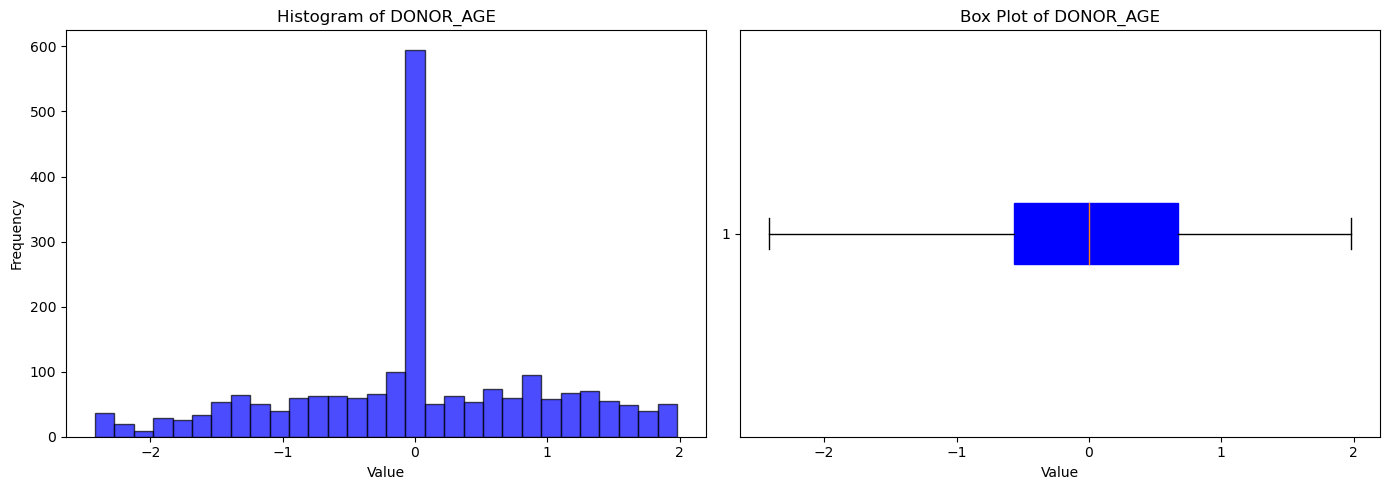

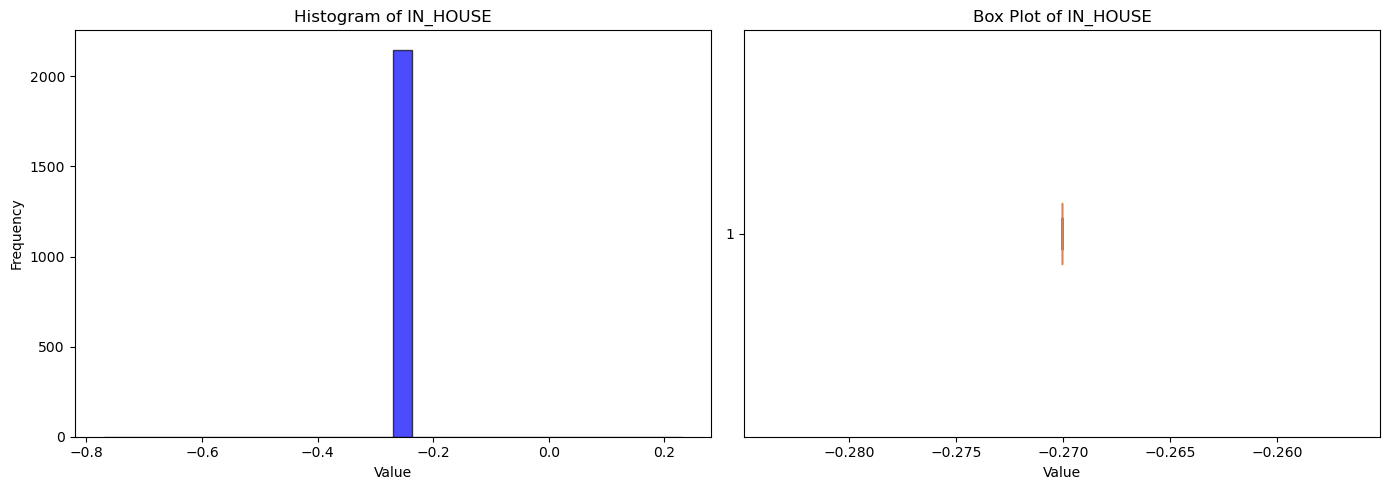

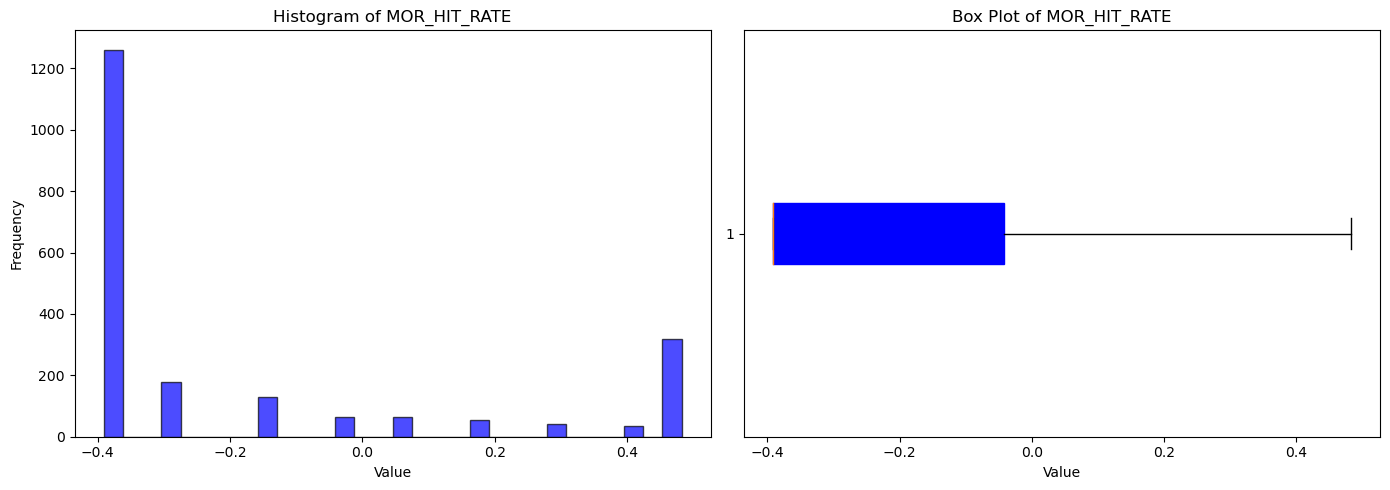

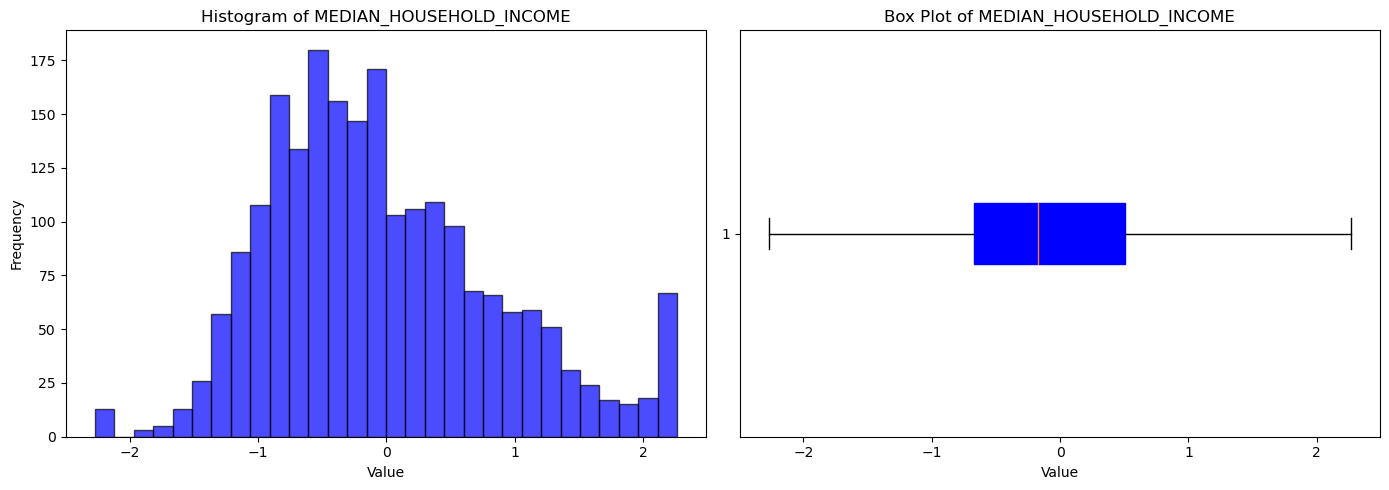

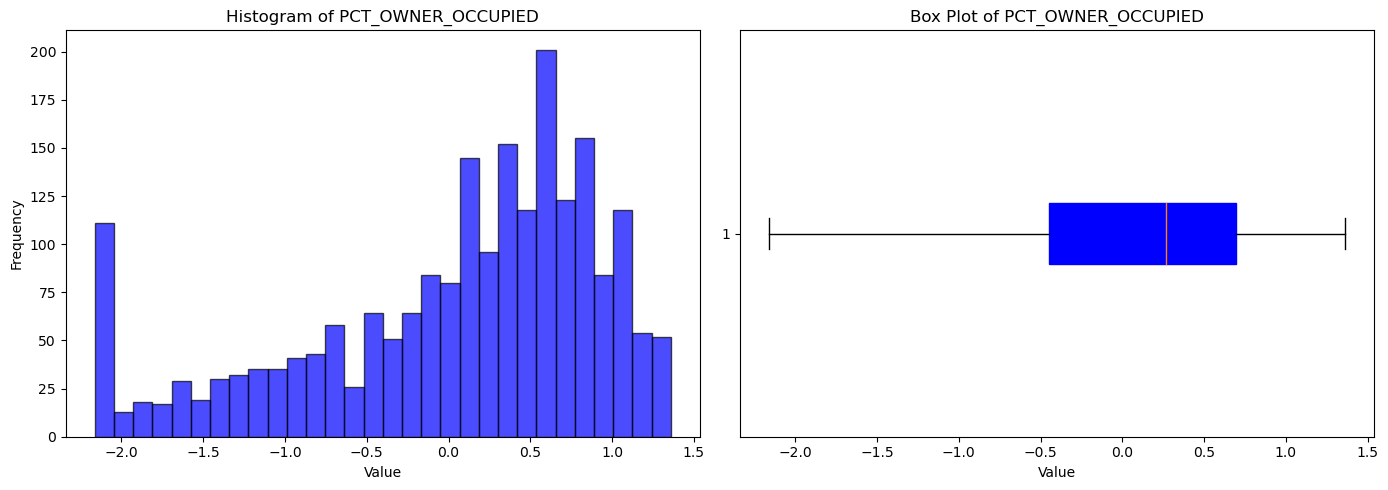

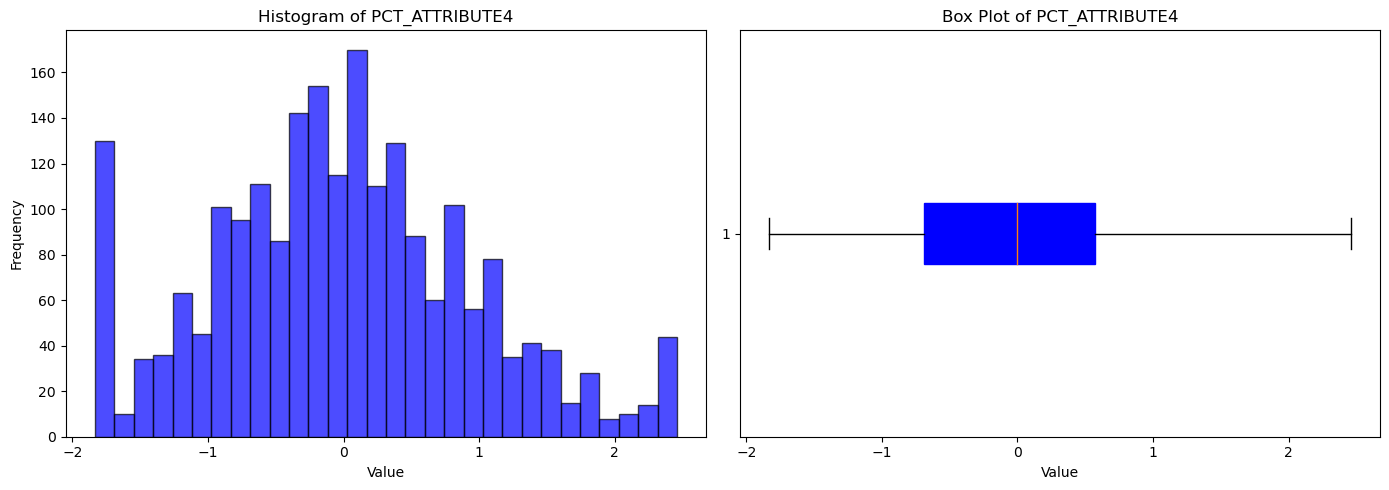

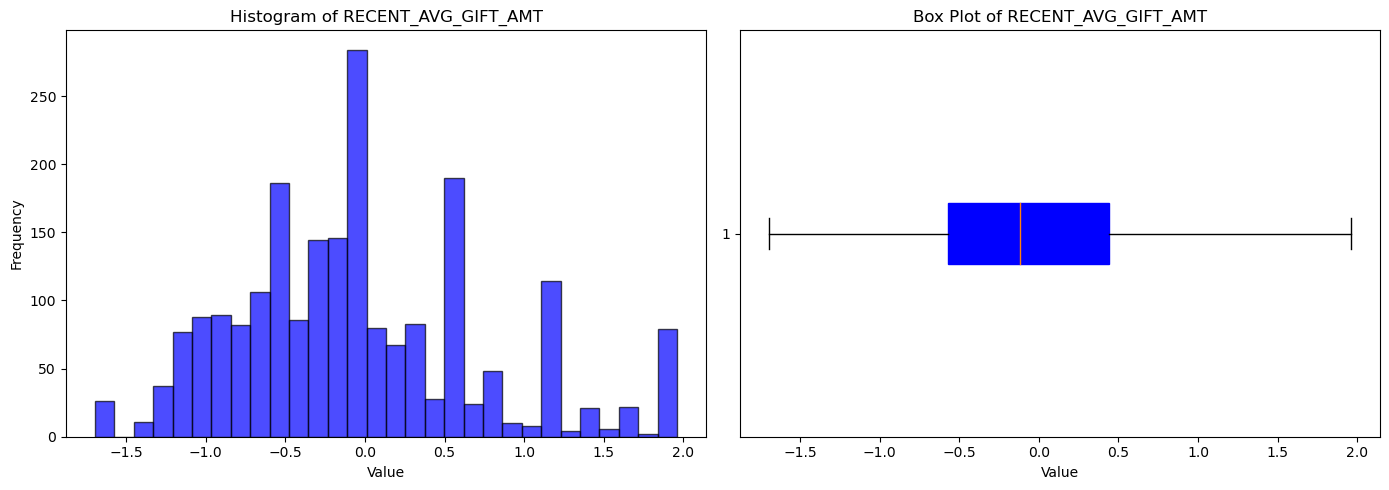

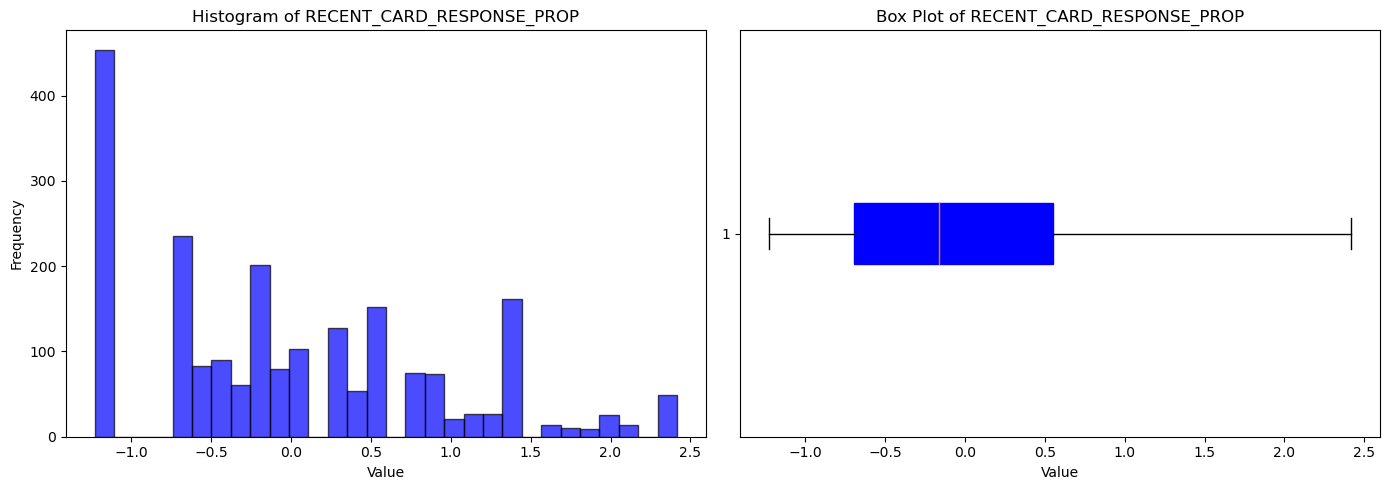

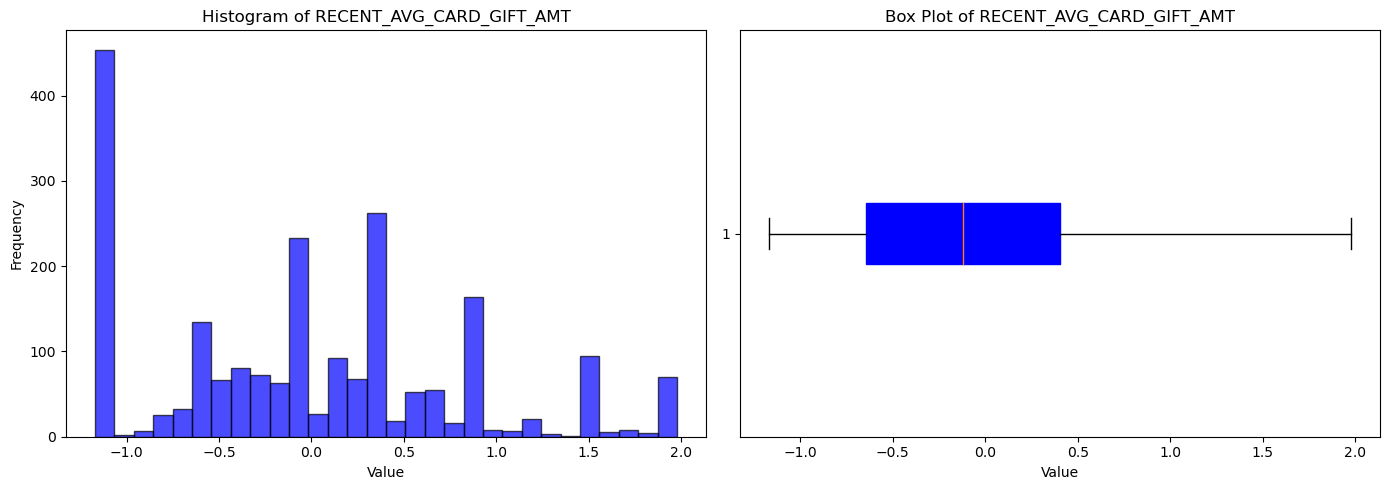

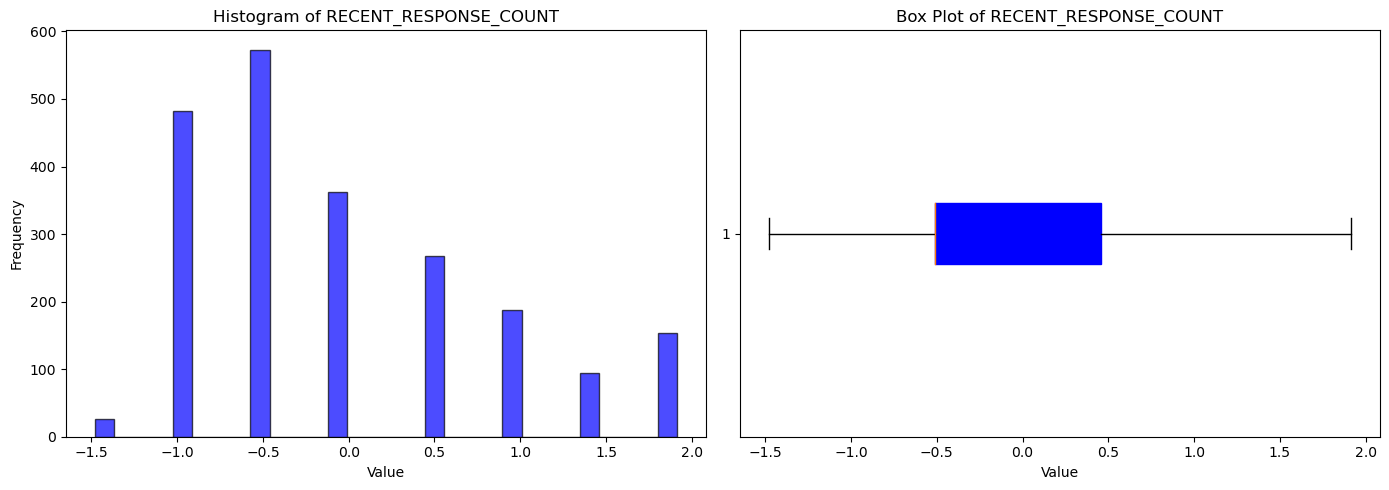

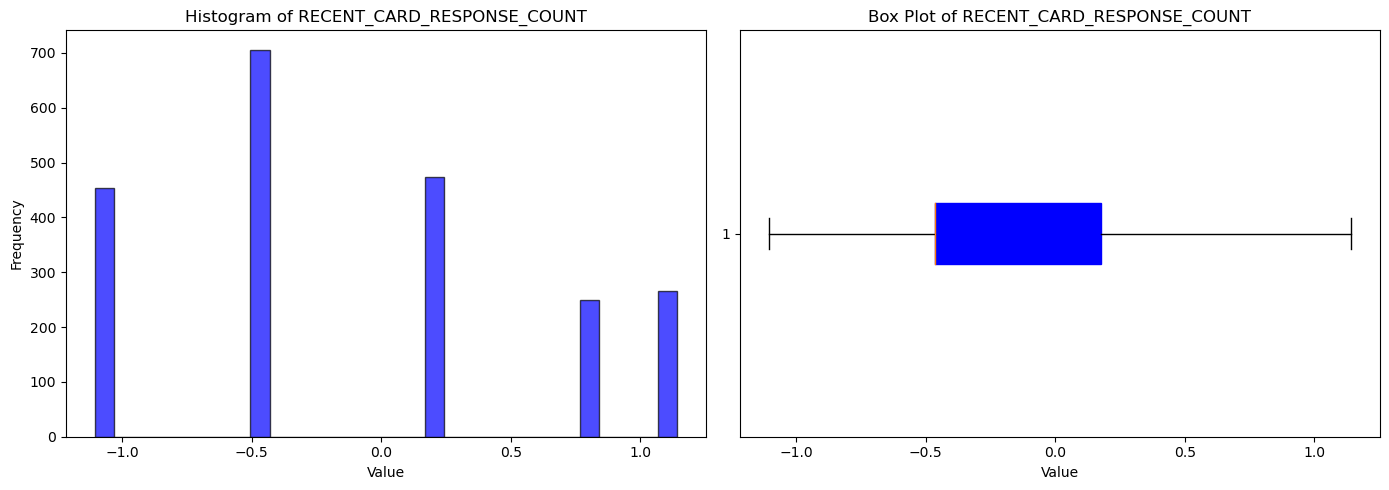

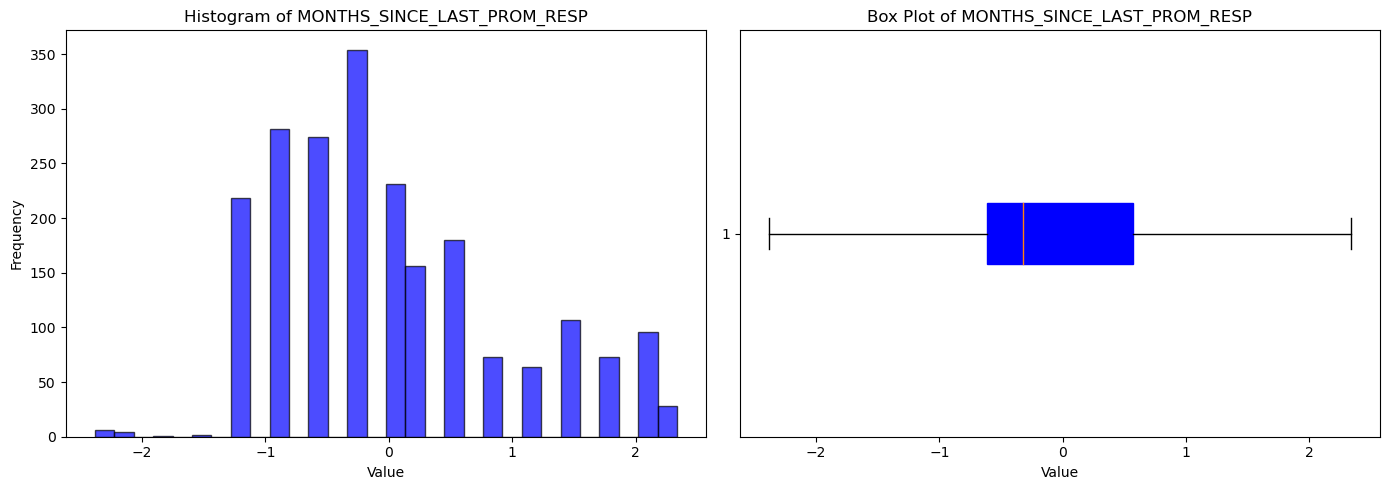

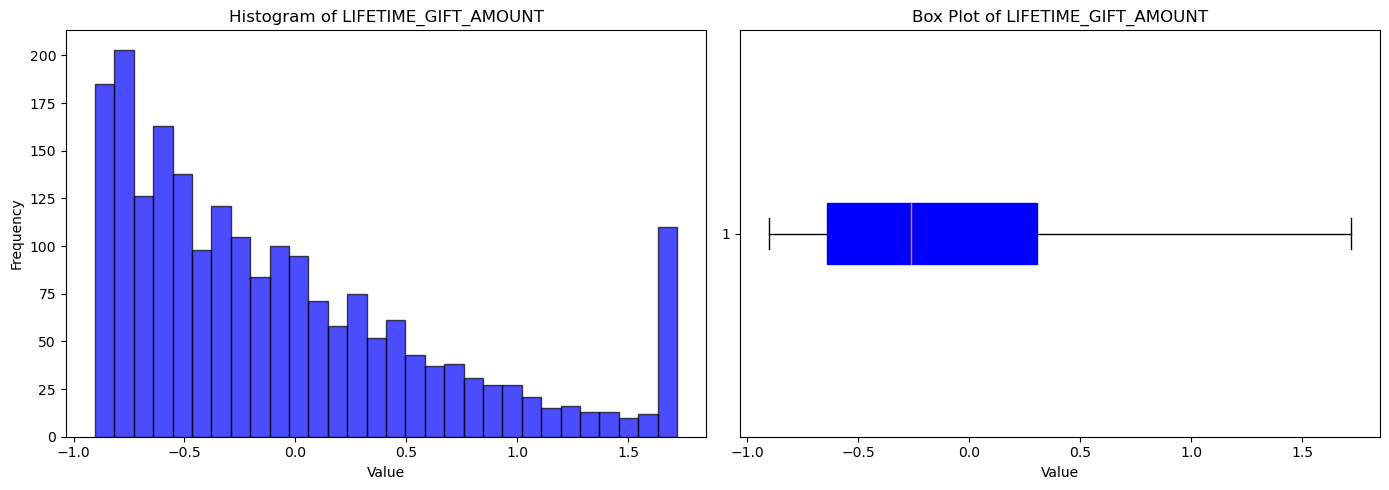

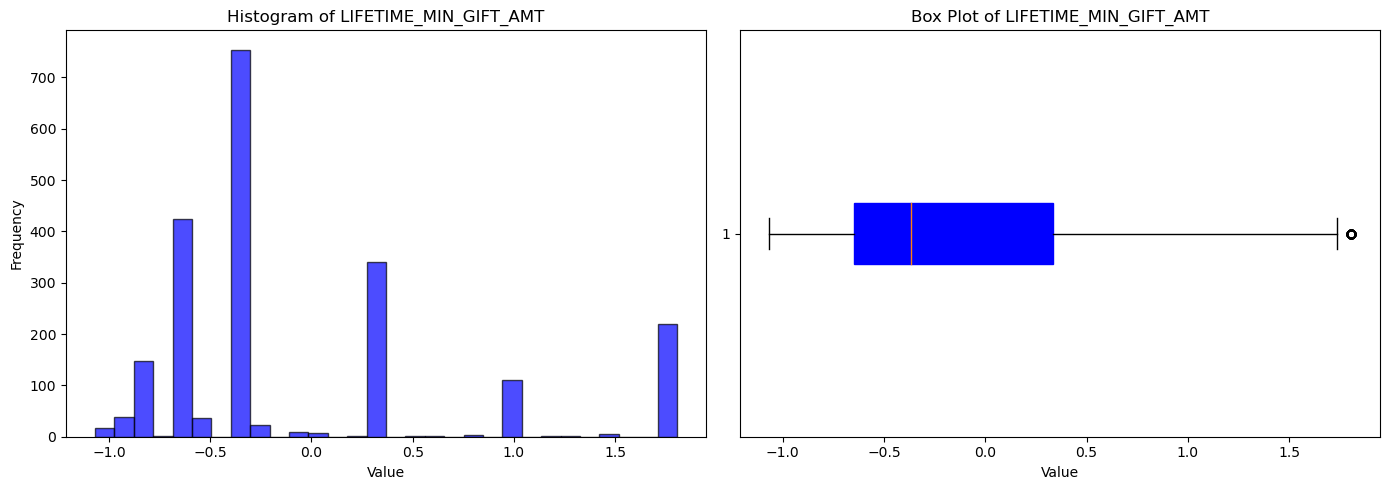

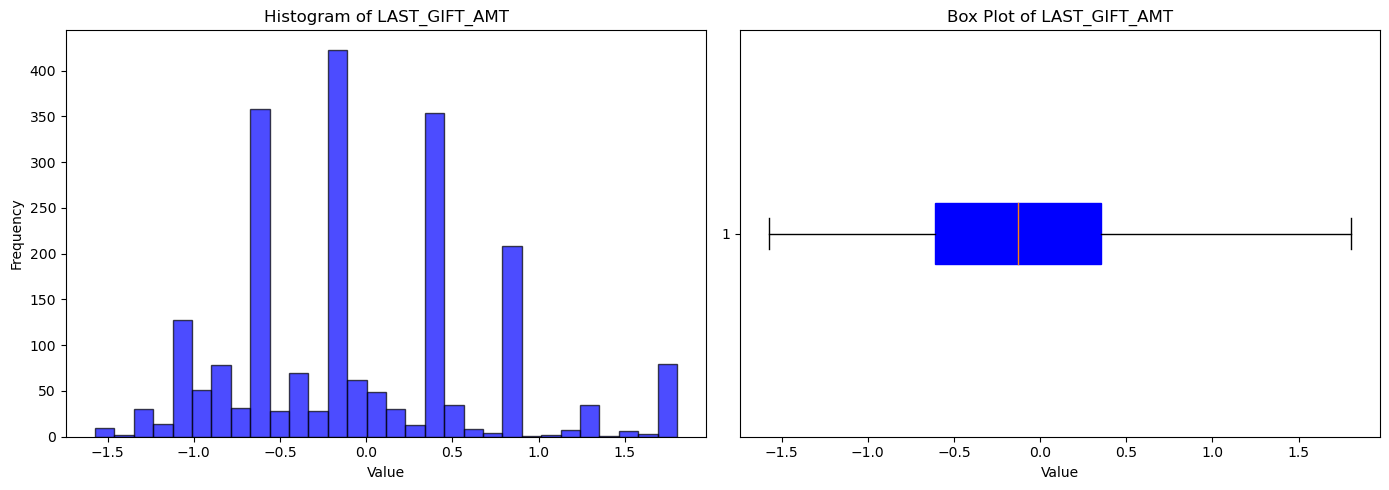

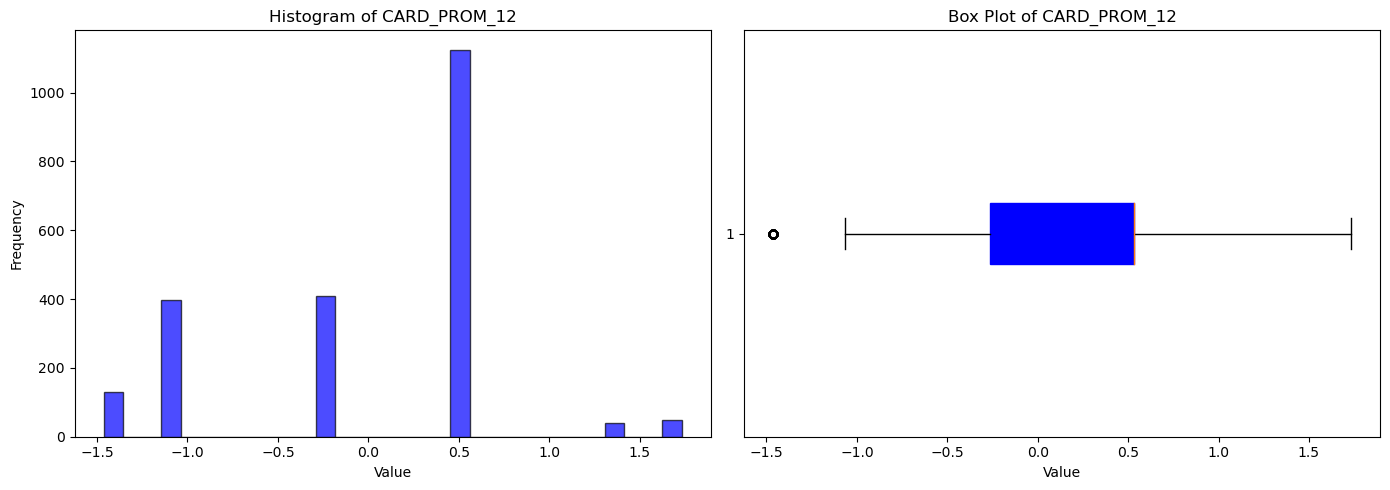

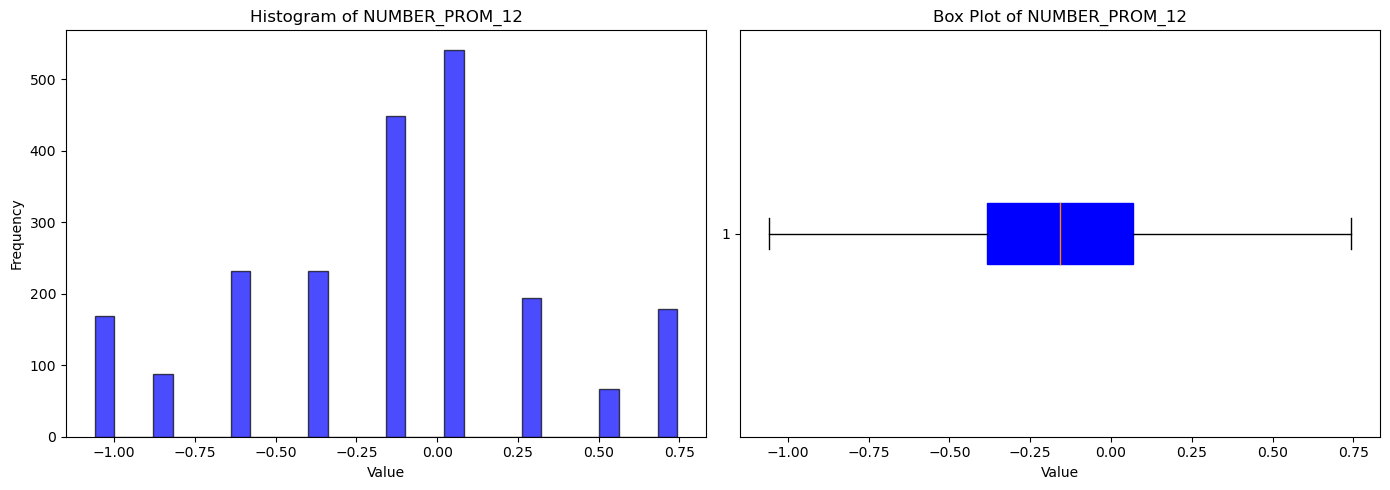

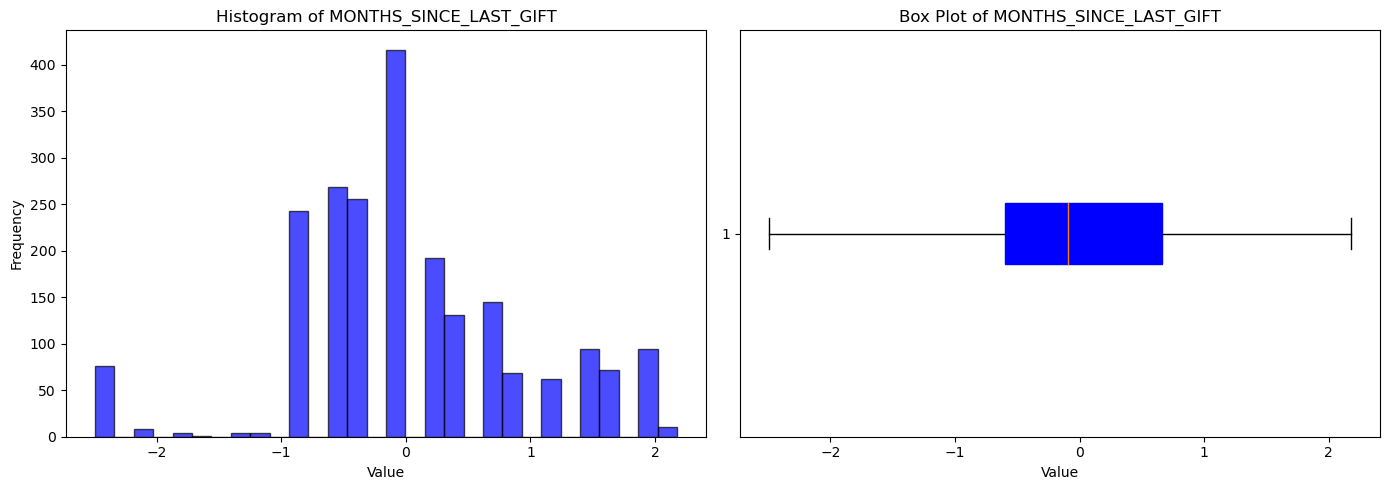

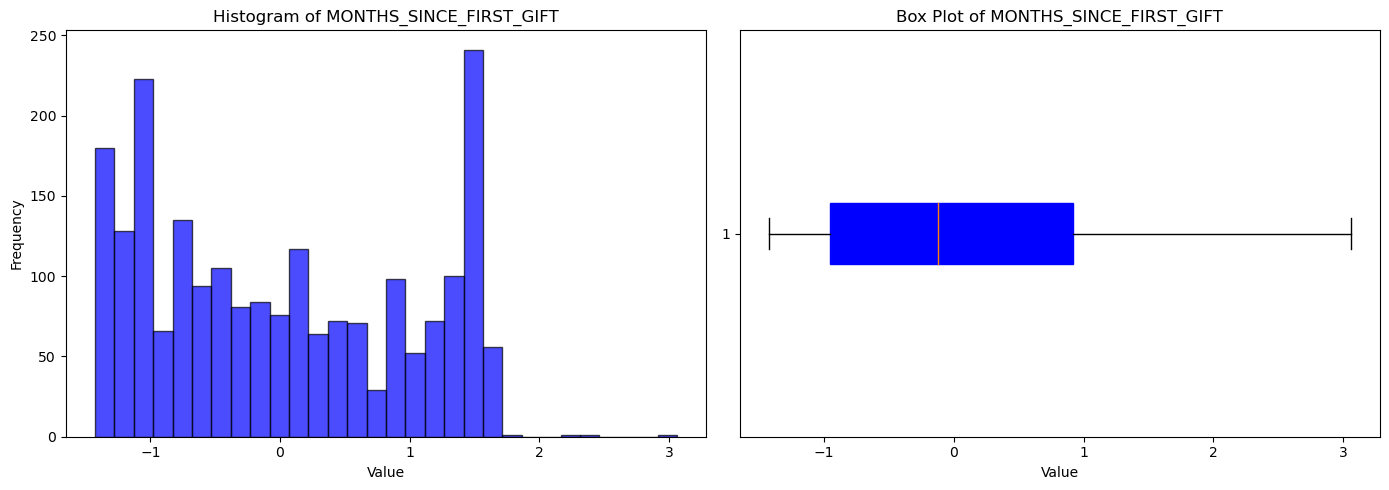

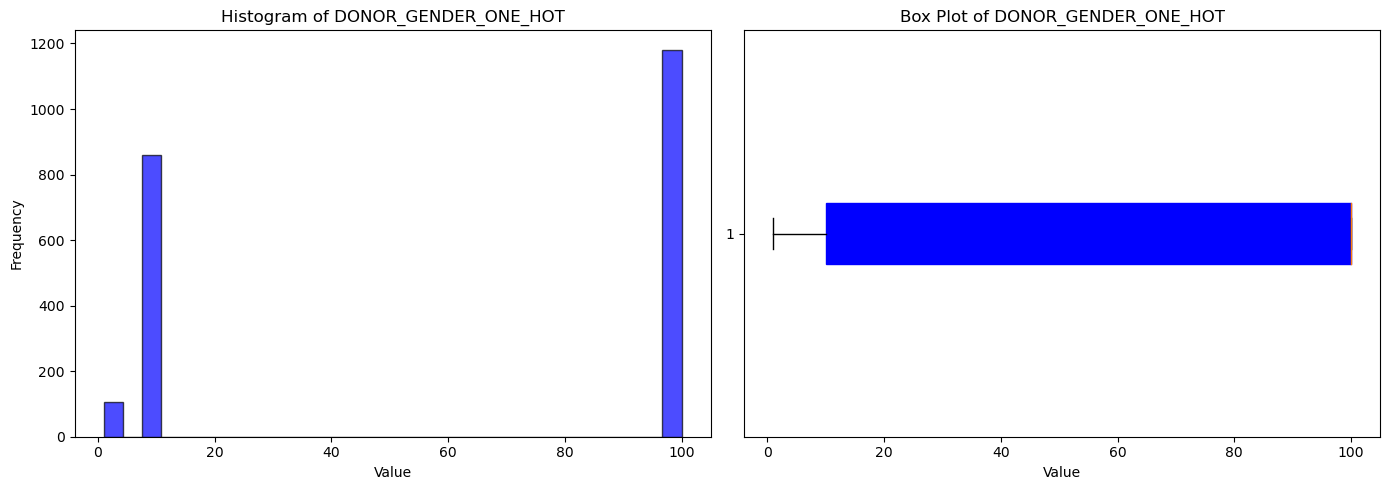

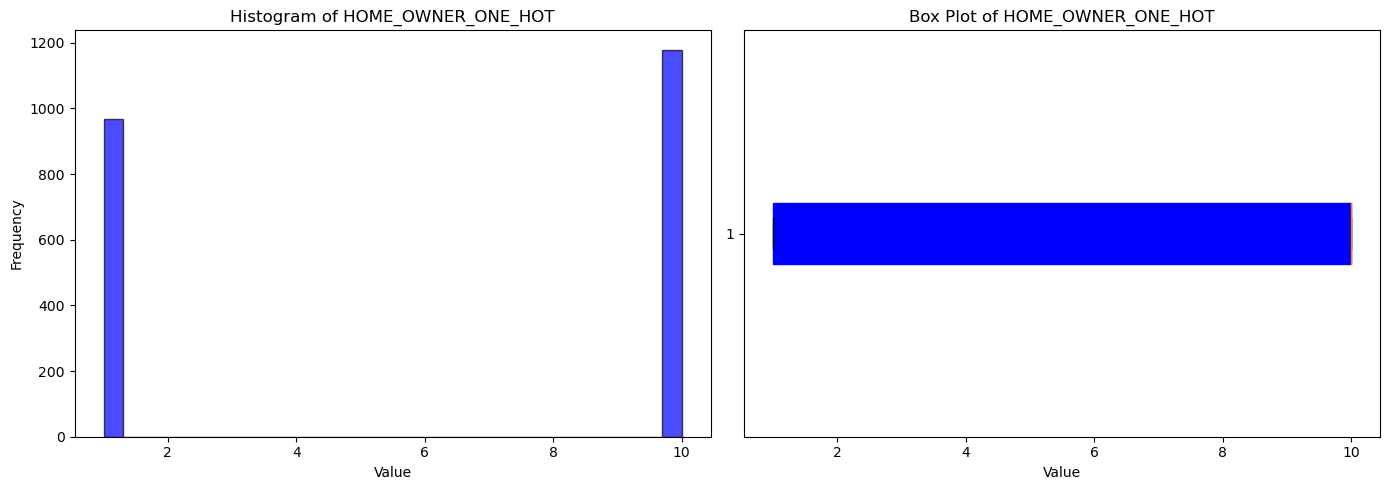

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Prospective raw data.csv')  # Replace 'Donor raw data.csv' with the path to your dataset file

# Define the columns with outliers
columns_with_outliers = ['DONOR_AGE', 'IN_HOUSE', 'MOR_HIT_RATE', 'MEDIAN_HOUSEHOLD_INCOME', 
                         'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'RECENT_AVG_GIFT_AMT', 
                         'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
                         'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT', 
                         'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
                         'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 
                         'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']

# Plot histograms and box plots for each column with outliers
for column in columns_with_outliers:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axs[0].hist(data[column].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[0].set_title(f"Histogram of {column}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    
    # Box plot
    axs[1].boxplot(data[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    axs[1].set_title(f"Box Plot of {column}")
    axs[1].set_xlabel("Value")
    
    plt.tight_layout()
    plt.show()


In [53]:
# Save the updated DataFrame to a new CSV file
saved_data.to_csv('Prospective raw data.csv', index=False)
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT
0,-1.761439,0.652263,0.000000,-0.27005,0.000000,-0.986130,-0.391103,-4.337074e-16,-0.806833,0.312407,...,-0.367670,0.452498,-1.063950,-0.608544,1.924646,0.530284,1,0,100,1
1,-1.761384,1.510230,0.000000,-0.27005,0.000000,1.014065,-0.391103,-7.510669e-01,-0.753399,-0.020904,...,-0.788230,-0.608759,1.732826,0.742518,0.914533,1.548131,1,0,100,1
2,-1.758816,-1.349661,-1.937083,-0.27005,1.293748,1.014065,0.482655,-4.337074e-16,1.363896,0.788565,...,-0.367670,0.356020,-0.264872,0.292164,0.409477,0.451988,2,3,10,10
3,-1.757238,1.510230,1.155551,-0.27005,1.293748,1.014065,-0.274602,9.890224e-01,0.969825,0.645717,...,-0.367670,-0.608759,1.732826,0.742518,0.156948,1.548131,5,3,10,10
4,-1.756889,-1.635650,0.000000,-0.27005,-1.173847,-0.986130,-0.391103,-4.337074e-16,0.488926,1.264723,...,-0.648043,-1.091149,-0.264872,-0.158190,-0.095580,0.399790,2,3,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,1.737355,0.652263,-0.768754,-0.27005,-1.173847,1.014065,-0.041600,9.890224e-01,-0.452837,-0.401830,...,-0.928416,0.066586,-0.264872,-0.608544,1.924646,0.817369,4,3,100,1
2144,1.741281,-0.777683,-2.418159,-0.27005,0.059951,1.014065,0.482655,1.251778e+00,1.016580,-2.163615,...,1.735127,1.513756,-0.264872,0.742518,1.924646,-0.670254,5,1,10,1
2145,1.743262,0.366274,-0.218953,-0.27005,1.293748,1.014065,-0.391103,1.251778e+00,-0.392724,0.788565,...,-0.648043,-0.608759,0.534207,0.066987,-0.095580,0.295396,0,2,100,1
2146,1.749133,-0.205704,-1.112380,-0.27005,-0.556948,1.014065,0.191402,9.890224e-01,-0.072124,0.074328,...,1.034195,0.356020,0.534207,0.066987,-0.095580,-0.357070,0,3,100,1


In [54]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)

In [55]:
# Save the updated DataFrame back to the CSV file
data.to_csv('Prospective raw data.csv', index=False)
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT
0,-1.761439,0.652263,0.000000,-0.27005,0.000000,-0.986130,-0.391103,-4.337074e-16,-0.806833,0.312407,...,-0.367670,0.452498,-1.063950,-0.608544,1.924646,0.530284,1,0,100,1
1,-1.761384,1.510230,0.000000,-0.27005,0.000000,1.014065,-0.391103,-7.510669e-01,-0.753399,-0.020904,...,-0.788230,-0.608759,1.732826,0.742518,0.914533,1.548131,1,0,100,1
2,-1.758816,-1.349661,-1.937083,-0.27005,1.293748,1.014065,0.482655,-4.337074e-16,1.363896,0.788565,...,-0.367670,0.356020,-0.264872,0.292164,0.409477,0.451988,2,3,10,10
3,-1.757238,1.510230,1.155551,-0.27005,1.293748,1.014065,-0.274602,9.890224e-01,0.969825,0.645717,...,-0.367670,-0.608759,1.732826,0.742518,0.156948,1.548131,5,3,10,10
4,-1.756889,-1.635650,0.000000,-0.27005,-1.173847,-0.986130,-0.391103,-4.337074e-16,0.488926,1.264723,...,-0.648043,-1.091149,-0.264872,-0.158190,-0.095580,0.399790,2,3,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,1.737355,0.652263,-0.768754,-0.27005,-1.173847,1.014065,-0.041600,9.890224e-01,-0.452837,-0.401830,...,-0.928416,0.066586,-0.264872,-0.608544,1.924646,0.817369,4,3,100,1
2144,1.741281,-0.777683,-2.418159,-0.27005,0.059951,1.014065,0.482655,1.251778e+00,1.016580,-2.163615,...,1.735127,1.513756,-0.264872,0.742518,1.924646,-0.670254,5,1,10,1
2145,1.743262,0.366274,-0.218953,-0.27005,1.293748,1.014065,-0.391103,1.251778e+00,-0.392724,0.788565,...,-0.648043,-0.608759,0.534207,0.066987,-0.095580,0.295396,0,2,100,1
2146,1.749133,-0.205704,-1.112380,-0.27005,-0.556948,1.014065,0.191402,9.890224e-01,-0.072124,0.074328,...,1.034195,0.356020,0.534207,0.066987,-0.095580,-0.357070,0,3,100,1


In [56]:
# Load your real dataset
data = pd.read_csv('Donor raw data.csv')
data

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,...,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,URBANICITY_encoded,OVERLAY_SOURCE_encoded,DONOR_GENDER_ONE_HOT,HOME_OWNER_ONE_HOT,TARGET_B
0,-1.729225,0.668776,1.942050e+00,-0.281033,-1.163292,-0.995468,-0.353738,4.272647e-16,-0.292139,0.290229,...,-0.132267,-0.290410,-0.194287,1.936257,0.599404,0,2,10.0,10.0,0.0
1,-1.729099,1.541408,1.388778e+00,-0.281033,1.885897,-0.995468,-0.353738,-9.647106e-01,-0.791519,0.105986,...,0.034716,1.291654,0.667420,-2.031052,1.397973,1,2,10.0,10.0,1.0
2,-1.728651,0.959653,1.112142e+00,-0.281033,0.666221,-0.995468,-0.353738,1.921633e+00,0.383851,-0.308561,...,0.201699,1.687169,0.667420,-2.031052,0.945450,3,2,100.0,10.0,0.0
3,-1.728633,0.450618,4.914041e-16,-0.281033,1.276059,1.004553,-0.353738,-4.836534e-01,-1.150829,-2.174021,...,-0.132267,1.687169,0.667420,-2.031052,0.599404,5,3,100.0,10.0,0.0
4,-1.728580,0.668776,1.042983e+00,-0.281033,-1.163292,1.004553,0.435467,-2.596124e-03,-0.085079,0.935079,...,0.702649,0.500622,0.667420,-0.047397,0.599404,1,3,100.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,1.704140,0.377899,4.897112e-01,-0.281033,0.056384,1.004553,0.435467,9.595184e-01,0.420392,-0.769168,...,-0.132267,0.500622,0.021140,-0.047397,0.306595,5,3,100.0,10.0,0.0
19368,1.704552,1.541408,1.250460e+00,-0.281033,0.666221,1.004553,0.435467,9.595184e-01,0.280321,-0.124318,...,-0.549725,0.500622,0.021140,0.696473,1.610924,4,3,100.0,10.0,0.0
19369,1.705197,-1.076488,4.914041e-16,-0.281033,-1.773130,1.004553,-0.353738,4.272647e-16,-0.846329,0.198107,...,-0.132267,-1.476957,-0.840566,1.192386,-1.237305,3,2,10.0,1.0,0.0
19370,1.705716,1.347490,1.319619e+00,-0.281033,1.276059,1.004553,-0.353738,1.921633e+00,0.481292,0.658715,...,0.702649,1.291654,0.667420,-2.031052,1.584305,0,3,10.0,1.0,0.0


In [57]:
# Load your real dataset
data = pd.read_csv('Prospective raw data.csv')

# Define your features (X) for your test data
# Include all the columns you mentioned as your features
X_test = data[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE',
               'INCOME_GROUP', 'PUBLISHED_PHONE', 
               'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOUSEHOLD_INCOME', 
               'PCT_OWNER_OCCUPIED', 'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_AVG_GIFT_AMT', 
               'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT', 
               'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_GIFT_AMOUNT', 
               'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 
               'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'URBANICITY_encoded', 'OVERLAY_SOURCE_encoded', 'DONOR_GENDER_ONE_HOT', 'HOME_OWNER_ONE_HOT']]

# Now X_test is defined and contains the features of your test dataset


In [58]:
import pickle

# Load the model from the file
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [59]:
# Load the test dataset
test_data = pd.read_csv('Prospective raw data.csv')  

In [60]:
# Make predictions on the test data
y_pred = loaded_model.predict(X_test)


In [61]:
# Make predictions on the test data
y_pred = loaded_model.predict(test_data)

# Print the predictions
print("Predictions:", y_pred)

Predictions: [0. 1. 1. ... 0. 0. 0.]
